In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tabulate
import seaborn as sns
import researchpy as rp
import pandas_profiling
import ydata_profiling

C:\Users\mdaum\AppData\Local\Temp\ipykernel_13208\1446752245.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:

data= pd.read_csv("G:\\My Drive\\Ryerson\\Capstone\\METABRIC_RNA_Mutation.csv\\METABRIC_RNA_Mutation.csv", sep=",")

C:\Users\mdaum\AppData\Local\Temp\ipykernel_13208\4282095328.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("G:\\My Drive\\Ryerson\\Capstone\\METABRIC_RNA_Mutation.csv\\METABRIC_RNA_Mutation.csv", sep=",")


In [3]:
data.head()


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [4]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


Subsetting clinical data except the patient id column  and description of clinical data

In [5]:
df_clinical =data.iloc[:, 1:31]
df_clinical.info()
df_clinical.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                1904 non-null   float64
 1   type_of_breast_surgery          1882 non-null   object 
 2   cancer_type                     1904 non-null   object 
 3   cancer_type_detailed            1889 non-null   object 
 4   cellularity                     1850 non-null   object 
 5   chemotherapy                    1904 non-null   int64  
 6   pam50_+_claudin-low_subtype     1904 non-null   object 
 7   cohort                          1904 non-null   float64
 8   er_status_measured_by_ihc       1874 non-null   object 
 9   er_status                       1904 non-null   object 
 10  neoplasm_histologic_grade       1832 non-null   float64
 11  her2_status_measured_by_snp6    1904 non-null   object 
 12  her2_status                     19

age_at_diagnosis  chemotherapy       cohort  neoplasm_histologic_grade  \
count       1904.000000   1904.000000  1904.000000                1832.000000   
mean          61.087054      0.207983     2.643908                   2.415939   
std           12.978711      0.405971     1.228615                   0.650612   
min           21.930000      0.000000     1.000000                   1.000000   
25%           51.375000      0.000000     1.000000                   2.000000   
50%           61.770000      0.000000     3.000000                   3.000000   
75%           70.592500      0.000000     3.000000                   3.000000   
max           96.290000      1.000000     5.000000                   3.000000   

       hormone_therapy  lymph_nodes_examined_positive  mutation_count  \
count      1904.000000                    1904.000000     1859.000000   
mean          0.616597                       2.002101        5.697687   
std           0.486343                       4.079993        4.058778   
min           0.000000                       0.000000        1.000000   
25%           0.000000                       0.000000        3.000000   
50%           1.000000                       0.000000        5.000000   
75%           1.000000                       2.000000        7.000000   
max           1.000000                      45.000000       80.000000   

       nottingham_prognostic_index  overall_survival_months  overall_survival  \
count                  1904.000000              1904.000000       1904.000000   
mean                      4.033019               125.121324          0.420693   
std                       1.144492                76.334148          0.493800   
min                       1.000000                 0.000000          0.000000   
25%                       3.046000                60.825000          0.000000   
50%                       4.042000               115.616667          0.000000   
75%                       5.040250               184.716667          1.000000   
max                       6.360000               355.200000          1.000000   

       radio_therapy   tumor_size  tumor_stage  
count    1904.000000  1884.000000  1403.000000  
mean        0.597164    26.238726     1.750535  
std         0.490597    15.160976     0.628999  
min         0.000000     1.000000     0.000000  
25%         0.000000    17.000000     1.000000  
50%         1.000000    23.000000     2.000000  
75%         1.000000    30.000000     2.000000  
max         1.000000   182.000000     4.000000

In [6]:
#Finding missing data and the percentage of it in each column
total = df_clinical.isnull().sum().sort_values(ascending = False)
total


tumor_stage                       501
3-gene_classifier_subtype         204
primary_tumor_laterality          106
neoplasm_histologic_grade          72
cellularity                        54
mutation_count                     45
er_status_measured_by_ihc          30
type_of_breast_surgery             22
tumor_size                         20
tumor_other_histologic_subtype     15
cancer_type_detailed               15
oncotree_code                      15
death_from_cancer                   1
overall_survival_months             0
overall_survival                    0
radio_therapy                       0
nottingham_prognostic_index         0
pr_status                           0
age_at_diagnosis                    0
lymph_nodes_examined_positive       0
integrative_cluster                 0
hormone_therapy                     0
her2_status                         0
her2_status_measured_by_snp6        0
er_status                           0
cohort                              0
pam50_+_clau

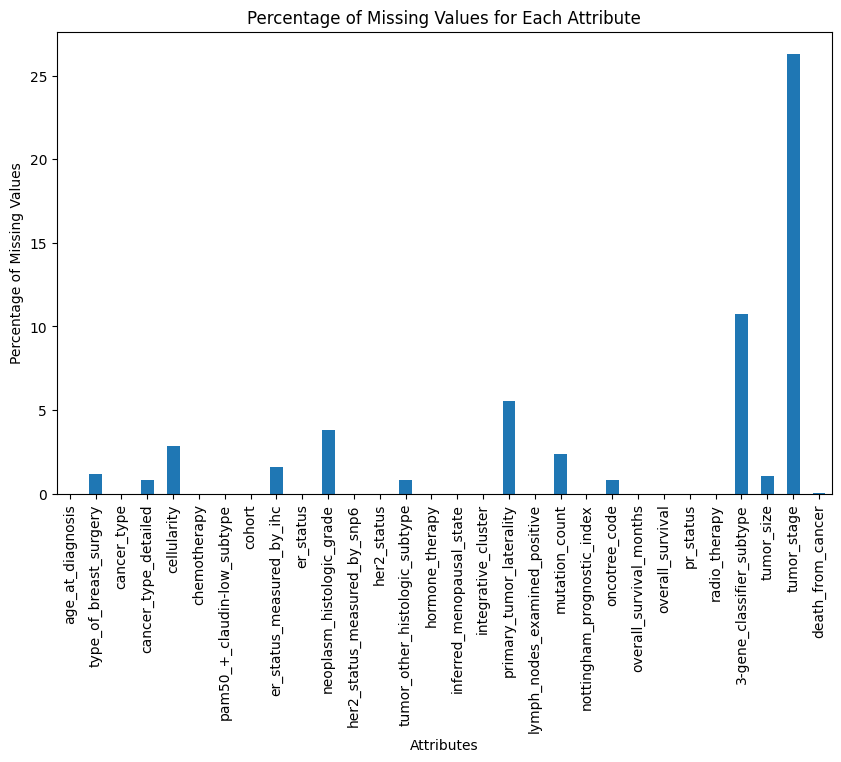

In [7]:
missing_percentage = (df_clinical.isnull().sum() / len(df_clinical)) * 100
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values for Each Attribute')
plt.show()

Getting all the categorical values and their levels, as well as converting other variables to categorical

In [8]:
categorical_variables= ["type_of_breast_surgery","cancer_type","cancer_type_detailed","cellularity","chemotherapy","pam50_+_claudin-low_subtype","cohort","er_status_measured_by_ihc",
"er_status","neoplasm_histologic_grade","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype","hormone_therapy","inferred_menopausal_state","integrative_cluster",
"primary_tumor_laterality","oncotree_code","overall_survival","pr_status","radio_therapy","3-gene_classifier_subtype","tumor_stage","death_from_cancer"]
for i in categorical_variables:
    df_clinical[i] =df_clinical[i].astype("category")
print(df_clinical.dtypes)

age_at_diagnosis                   float64
type_of_breast_surgery            category
cancer_type                       category
cancer_type_detailed              category
cellularity                       category
chemotherapy                      category
pam50_+_claudin-low_subtype       category
cohort                            category
er_status_measured_by_ihc         category
er_status                         category
neoplasm_histologic_grade         category
her2_status_measured_by_snp6      category
her2_status                       category
tumor_other_histologic_subtype    category
hormone_therapy                   category
inferred_menopausal_state         category
integrative_cluster               category
primary_tumor_laterality          category
lymph_nodes_examined_positive      float64
mutation_count                     float64
nottingham_prognostic_index        float64
oncotree_code                     category
overall_survival_months            float64
overall_sur

In [9]:
for i in categorical_variables:
    unique_values = df_clinical[i].unique()
    print(f"Column: {i}\nUnique Values: {unique_values}\n")

Column: type_of_breast_surgery
Unique Values: ['MASTECTOMY', 'BREAST CONSERVING', NaN]
Categories (2, object): ['BREAST CONSERVING', 'MASTECTOMY']

Column: cancer_type
Unique Values: ['Breast Cancer', 'Breast Sarcoma']
Categories (2, object): ['Breast Cancer', 'Breast Sarcoma']

Column: cancer_type_detailed
Unique Values: ['Breast Invasive Ductal Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma', 'Breast Invasive Lobular Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma', 'Breast', NaN, 'Metaplastic Breast Cancer']
Categories (6, object): ['Breast', 'Breast Invasive Ductal Carcinoma', 'Breast Invasive Lobular Carcinoma', 'Breast Invasive Mixed Mucinous Carcinoma', 'Breast Mixed Ductal and Lobular Carcinoma', 'Metaplastic Breast Cancer']

Column: cellularity
Unique Values: [NaN, 'High', 'Moderate', 'Low']
Categories (3, object): ['High', 'Low', 'Moderate']

Column: chemotherapy
Unique Values: [0, 1]
Categories (2, int64): [0, 1]

Column: pam50_+_claudin-low_subtype
Unique Valu

C:\Users\mdaum\AppData\Local\Temp\ipykernel_13208\1896215383.py:3: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(f"Column: {i}\nUnique Values: {unique_values}\n")


Value counts for column 'type_of_breast_surgery':
+---+-------------------+-------+
|   |     Category      | Count |
+---+-------------------+-------+
| 0 |    MASTECTOMY     | 1127  |
| 1 | BREAST CONSERVING |  755  |
+---+-------------------+-------+



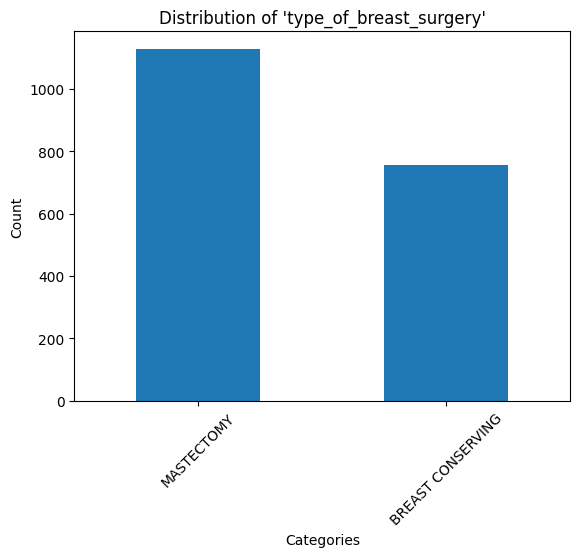

Value counts for column 'cancer_type':
+---+----------------+-------+
|   |    Category    | Count |
+---+----------------+-------+
| 0 | Breast Cancer  | 1903  |
| 1 | Breast Sarcoma |   1   |
+---+----------------+-------+



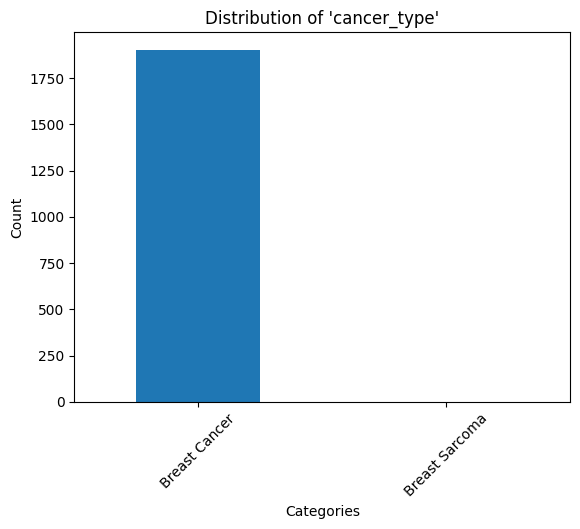

Value counts for column 'cancer_type_detailed':
+---+-------------------------------------------+-------+
|   |                 Category                  | Count |
+---+-------------------------------------------+-------+
| 0 |     Breast Invasive Ductal Carcinoma      | 1500  |
| 1 | Breast Mixed Ductal and Lobular Carcinoma |  207  |
| 2 |     Breast Invasive Lobular Carcinoma     |  142  |
| 3 | Breast Invasive Mixed Mucinous Carcinoma  |  22   |
| 4 |                  Breast                   |  17   |
| 5 |         Metaplastic Breast Cancer         |   1   |
+---+-------------------------------------------+-------+



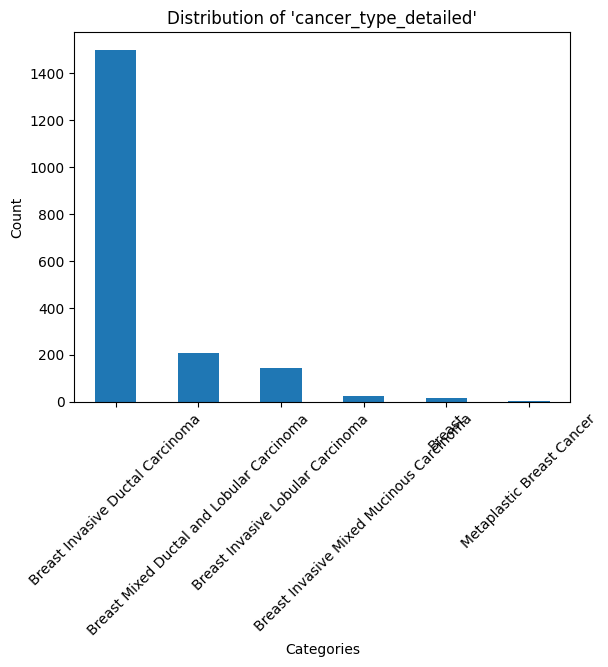

Value counts for column 'cellularity':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   High   |  939  |
| 1 | Moderate |  711  |
| 2 |   Low    |  200  |
+---+----------+-------+



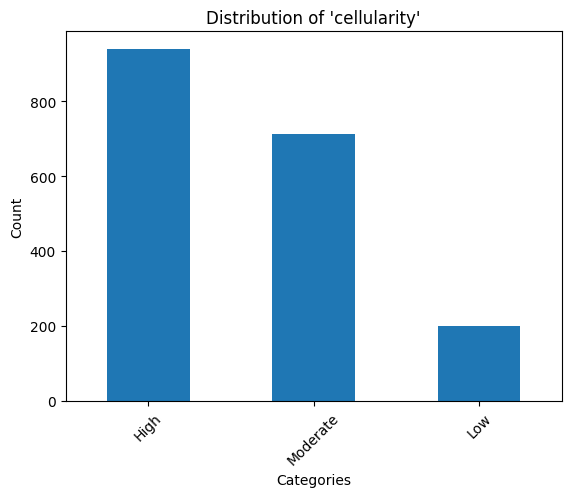

Value counts for column 'chemotherapy':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |    0     | 1508  |
| 1 |    1     |  396  |
+---+----------+-------+



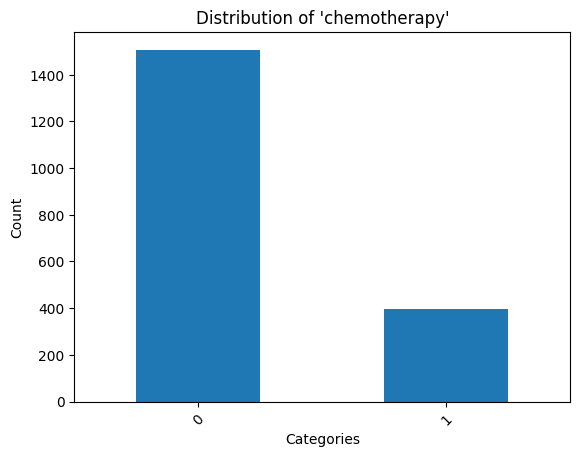

Value counts for column 'pam50_+_claudin-low_subtype':
+---+-------------+-------+
|   |  Category   | Count |
+---+-------------+-------+
| 0 |    LumA     |  679  |
| 1 |    LumB     |  461  |
| 2 |    Her2     |  220  |
| 3 |    Basal    |  199  |
| 4 | claudin-low |  199  |
| 5 |   Normal    |  140  |
| 6 |     NC      |   6   |
+---+-------------+-------+



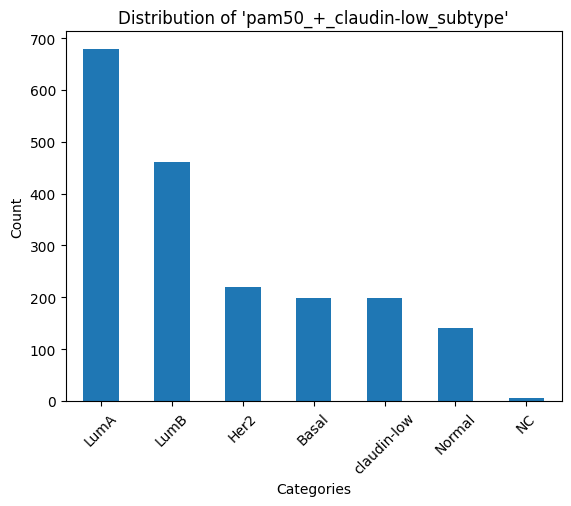

Value counts for column 'cohort':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   3.0    | 734.0 |
| 1 |   1.0    | 481.0 |
| 2 |   2.0    | 286.0 |
| 3 |   4.0    | 236.0 |
| 4 |   5.0    | 167.0 |
+---+----------+-------+



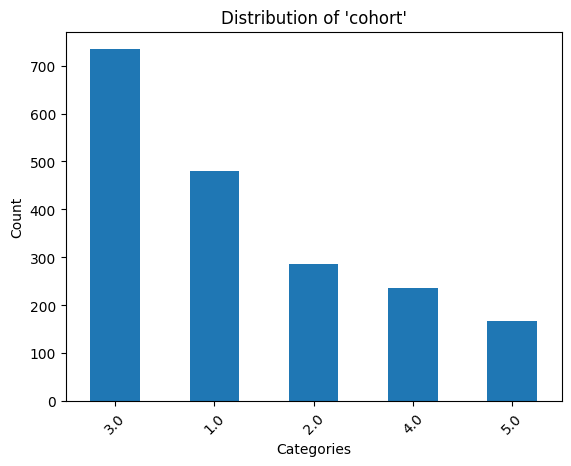

Value counts for column 'er_status_measured_by_ihc':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 | Positve  | 1445  |
| 1 | Negative |  429  |
+---+----------+-------+



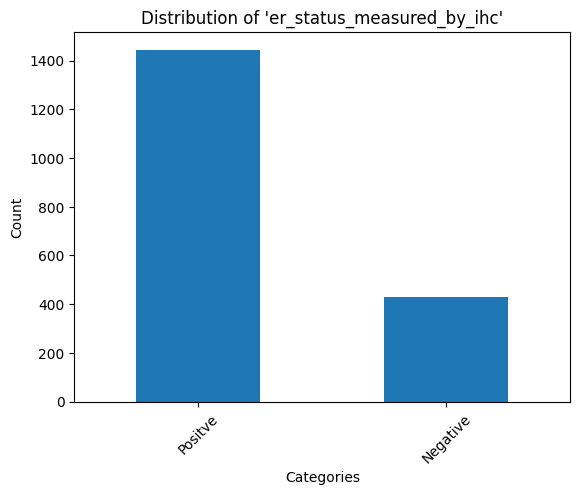

Value counts for column 'er_status':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 | Positive | 1459  |
| 1 | Negative |  445  |
+---+----------+-------+



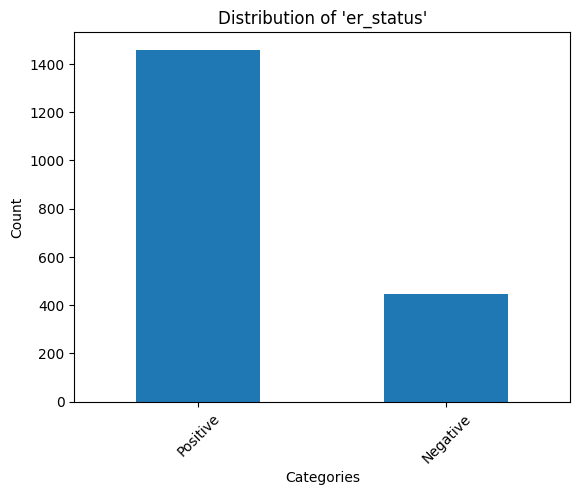

Value counts for column 'neoplasm_histologic_grade':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   3.0    | 927.0 |
| 1 |   2.0    | 740.0 |
| 2 |   1.0    | 165.0 |
+---+----------+-------+



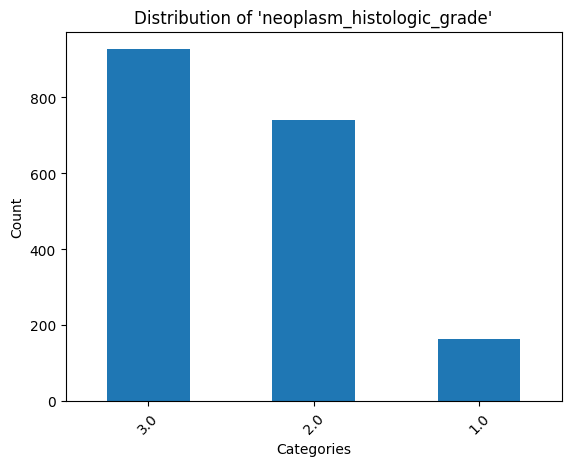

Value counts for column 'her2_status_measured_by_snp6':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 | NEUTRAL  | 1383  |
| 1 |   GAIN   |  417  |
| 2 |   LOSS   |  100  |
| 3 |  UNDEF   |   4   |
+---+----------+-------+



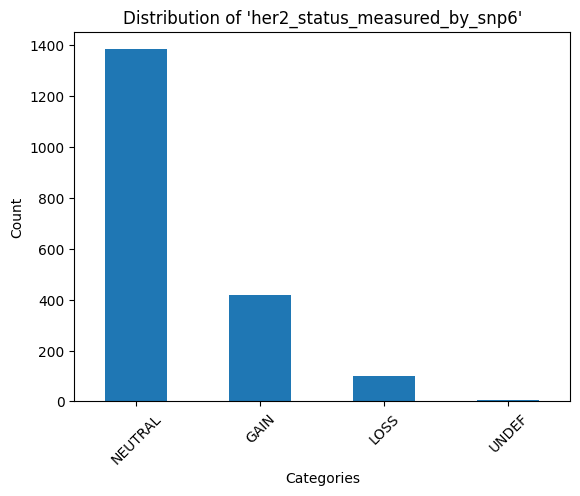

Value counts for column 'her2_status':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 | Negative | 1668  |
| 1 | Positive |  236  |
+---+----------+-------+



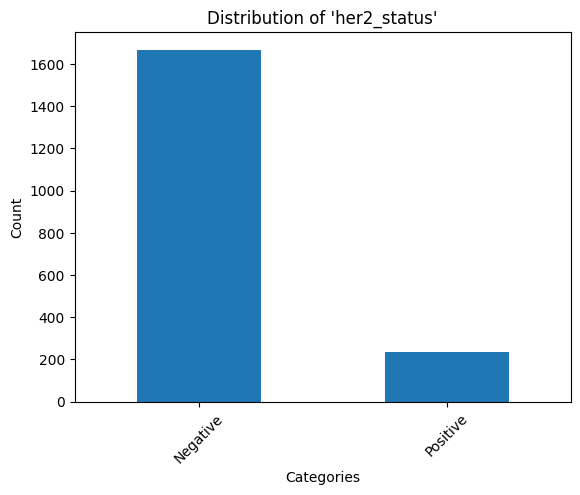

Value counts for column 'tumor_other_histologic_subtype':
+---+---------------------+-------+
|   |      Category       | Count |
+---+---------------------+-------+
| 0 |     Ductal/NST      | 1454  |
| 1 |        Mixed        |  207  |
| 2 |       Lobular       |  142  |
| 3 |      Medullary      |  25   |
| 4 |      Mucinous       |  22   |
| 5 | Tubular/ cribriform |  21   |
| 6 |        Other        |  17   |
| 7 |     Metaplastic     |   1   |
+---+---------------------+-------+



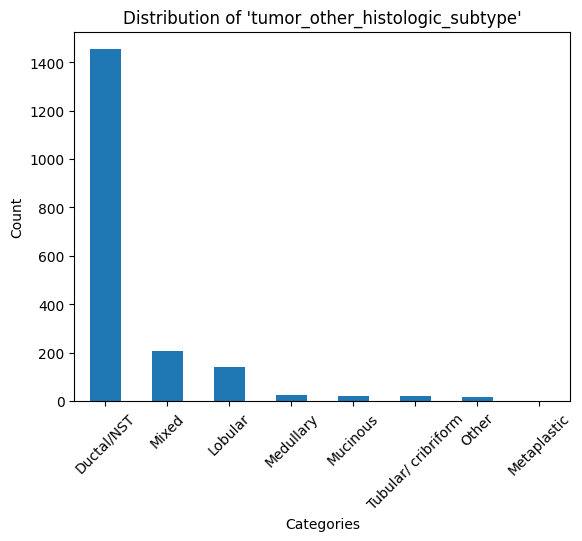

Value counts for column 'hormone_therapy':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |    1     | 1174  |
| 1 |    0     |  730  |
+---+----------+-------+



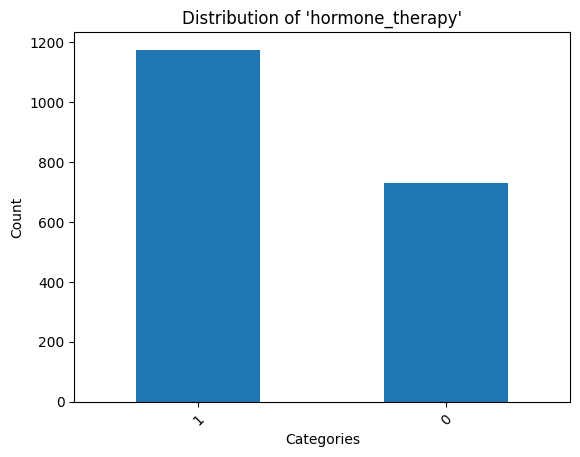

Value counts for column 'inferred_menopausal_state':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   Post   | 1493  |
| 1 |   Pre    |  411  |
+---+----------+-------+



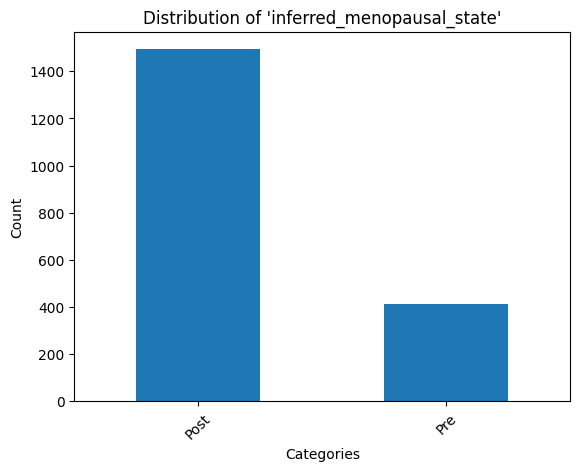

Value counts for column 'integrative_cluster':
+----+----------+-------+
|    | Category | Count |
+----+----------+-------+
| 0  |    8     |  289  |
| 1  |    3     |  282  |
| 2  |   4ER+   |  244  |
| 3  |    10    |  219  |
| 4  |    5     |  184  |
| 5  |    7     |  182  |
| 6  |    9     |  142  |
| 7  |    1     |  132  |
| 8  |    6     |  84   |
| 9  |   4ER-   |  74   |
| 10 |    2     |  72   |
+----+----------+-------+



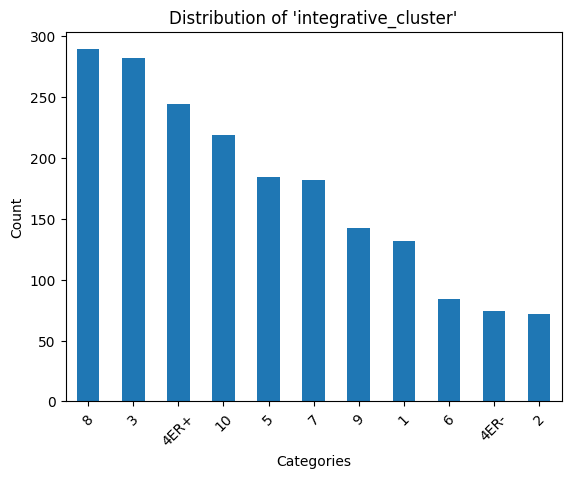

Value counts for column 'primary_tumor_laterality':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   Left   |  935  |
| 1 |  Right   |  863  |
+---+----------+-------+



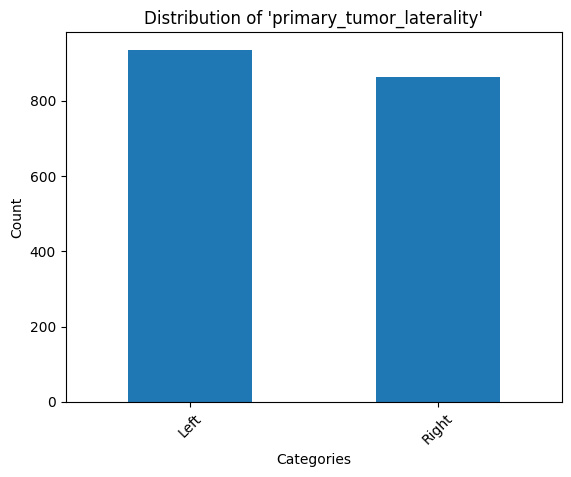

Value counts for column 'oncotree_code':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   IDC    | 1500  |
| 1 |   MDLC   |  207  |
| 2 |   ILC    |  142  |
| 3 |   IMMC   |  22   |
| 4 |  BREAST  |  17   |
| 5 |   MBC    |   1   |
+---+----------+-------+



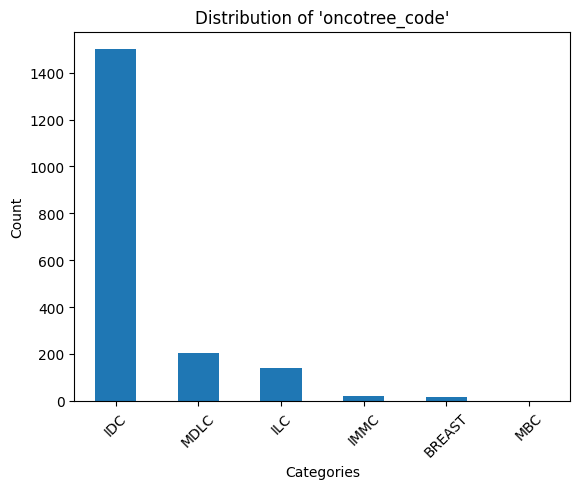

Value counts for column 'overall_survival':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |    0     | 1103  |
| 1 |    1     |  801  |
+---+----------+-------+



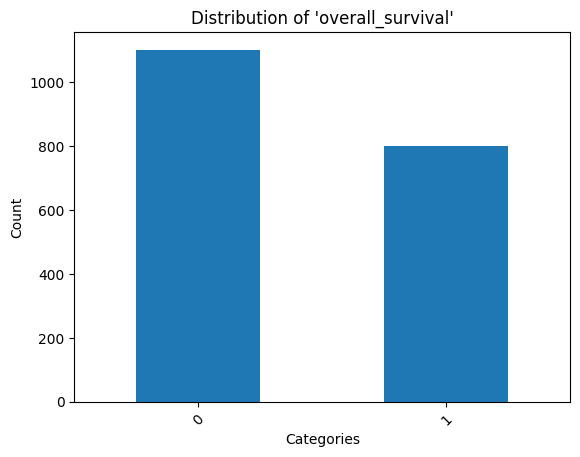

Value counts for column 'pr_status':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 | Positive | 1009  |
| 1 | Negative |  895  |
+---+----------+-------+



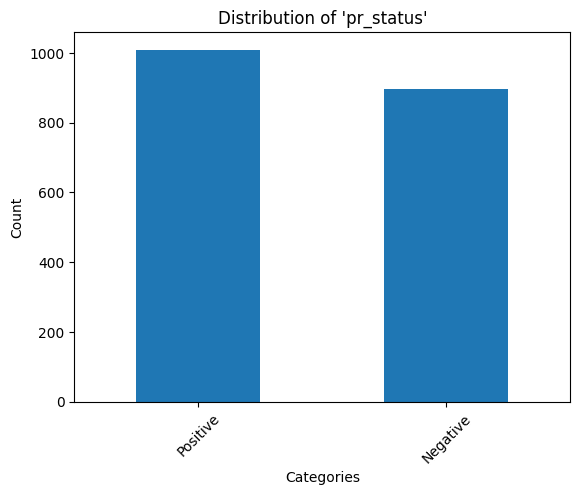

Value counts for column 'radio_therapy':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |    1     | 1137  |
| 1 |    0     |  767  |
+---+----------+-------+



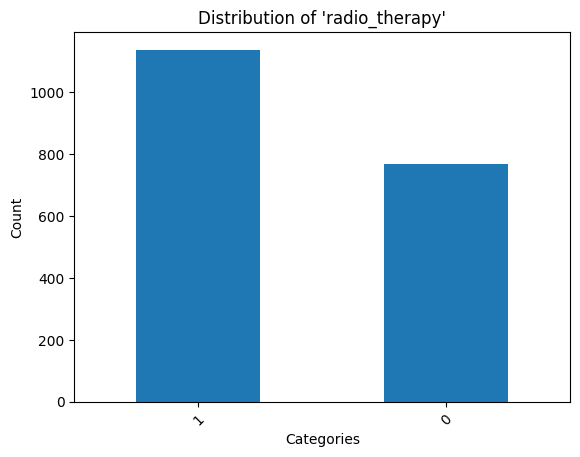

Value counts for column '3-gene_classifier_subtype':
+---+-----------------------+-------+
|   |       Category        | Count |
+---+-----------------------+-------+
| 0 | ER+/HER2- Low Prolif  |  619  |
| 1 | ER+/HER2- High Prolif |  603  |
| 2 |       ER-/HER2-       |  290  |
| 3 |         HER2+         |  188  |
+---+-----------------------+-------+



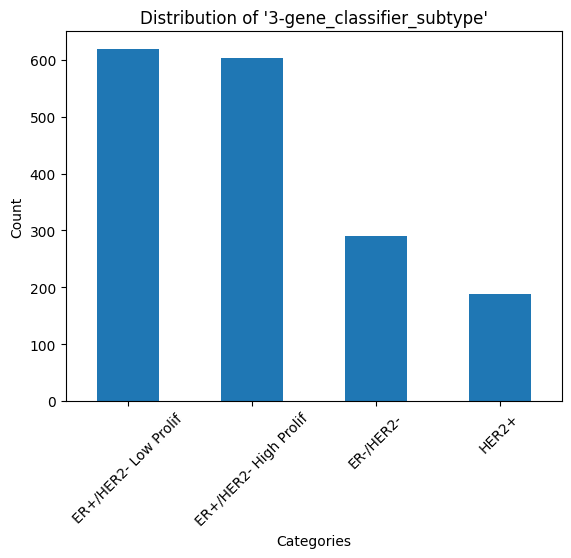

Value counts for column 'tumor_stage':
+---+----------+-------+
|   | Category | Count |
+---+----------+-------+
| 0 |   2.0    | 800.0 |
| 1 |   1.0    | 475.0 |
| 2 |   3.0    | 115.0 |
| 3 |   4.0    |  9.0  |
| 4 |   0.0    |  4.0  |
+---+----------+-------+



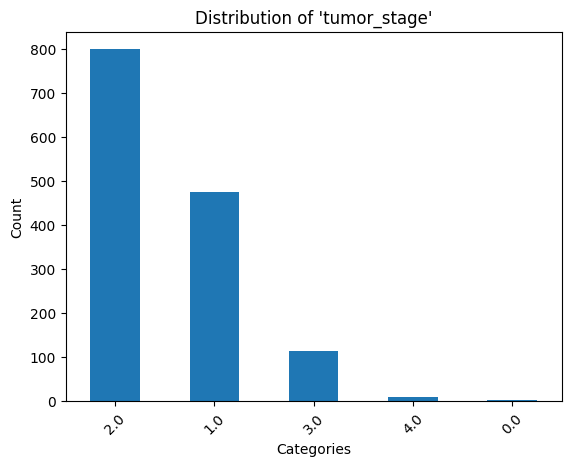

Value counts for column 'death_from_cancer':
+---+----------------------+-------+
|   |       Category       | Count |
+---+----------------------+-------+
| 0 |        Living        |  801  |
| 1 |   Died of Disease    |  622  |
| 2 | Died of Other Causes |  480  |
+---+----------------------+-------+



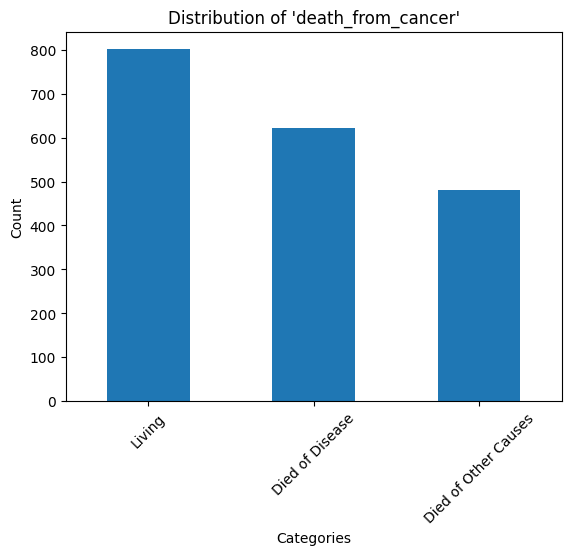

In [10]:
for i in categorical_variables:
    value_counts = df_clinical[i].value_counts()
    print(f"Value counts for column '{i}':")
    print(tabulate.tabulate(value_counts.reset_index(), headers=["Category", "Count"], tablefmt="pretty"))
    print()
    plt.figure()
    value_counts.plot(kind='bar')
    plt.title(f"Distribution of '{i}'")
    plt.xlabel("Categories")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

summary statistics for numerical variables in clinical attributes.


In [11]:

df_clinical.describe()

age_at_diagnosis  lymph_nodes_examined_positive  mutation_count  \
count       1904.000000                    1904.000000     1859.000000   
mean          61.087054                       2.002101        5.697687   
std           12.978711                       4.079993        4.058778   
min           21.930000                       0.000000        1.000000   
25%           51.375000                       0.000000        3.000000   
50%           61.770000                       0.000000        5.000000   
75%           70.592500                       2.000000        7.000000   
max           96.290000                      45.000000       80.000000   

       nottingham_prognostic_index  overall_survival_months   tumor_size  
count                  1904.000000              1904.000000  1884.000000  
mean                      4.033019               125.121324    26.238726  
std                       1.144492                76.334148    15.160976  
min                       1.000000                 0.000000     1.000000  
25%                       3.046000                60.825000    17.000000  
50%                       4.042000               115.616667    23.000000  
75%                       5.040250               184.716667    30.000000  
max                       6.360000               355.200000   182.000000

In [ ]:

plt.figure(figsize=(10, 6))
df_clinical.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot for Numeric Attributes')
plt.show()

Histograms for numerical variables to see the distribution

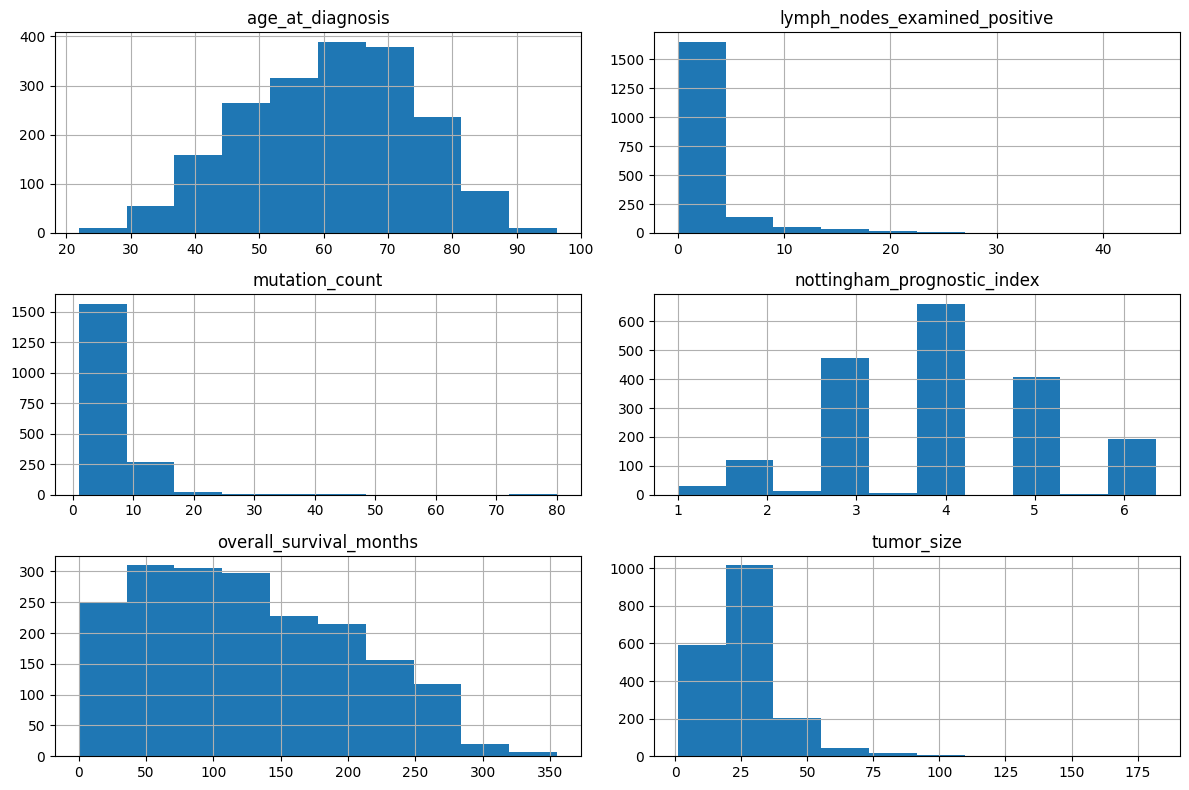

In [12]:
# Plotting histograms
df_clinical.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

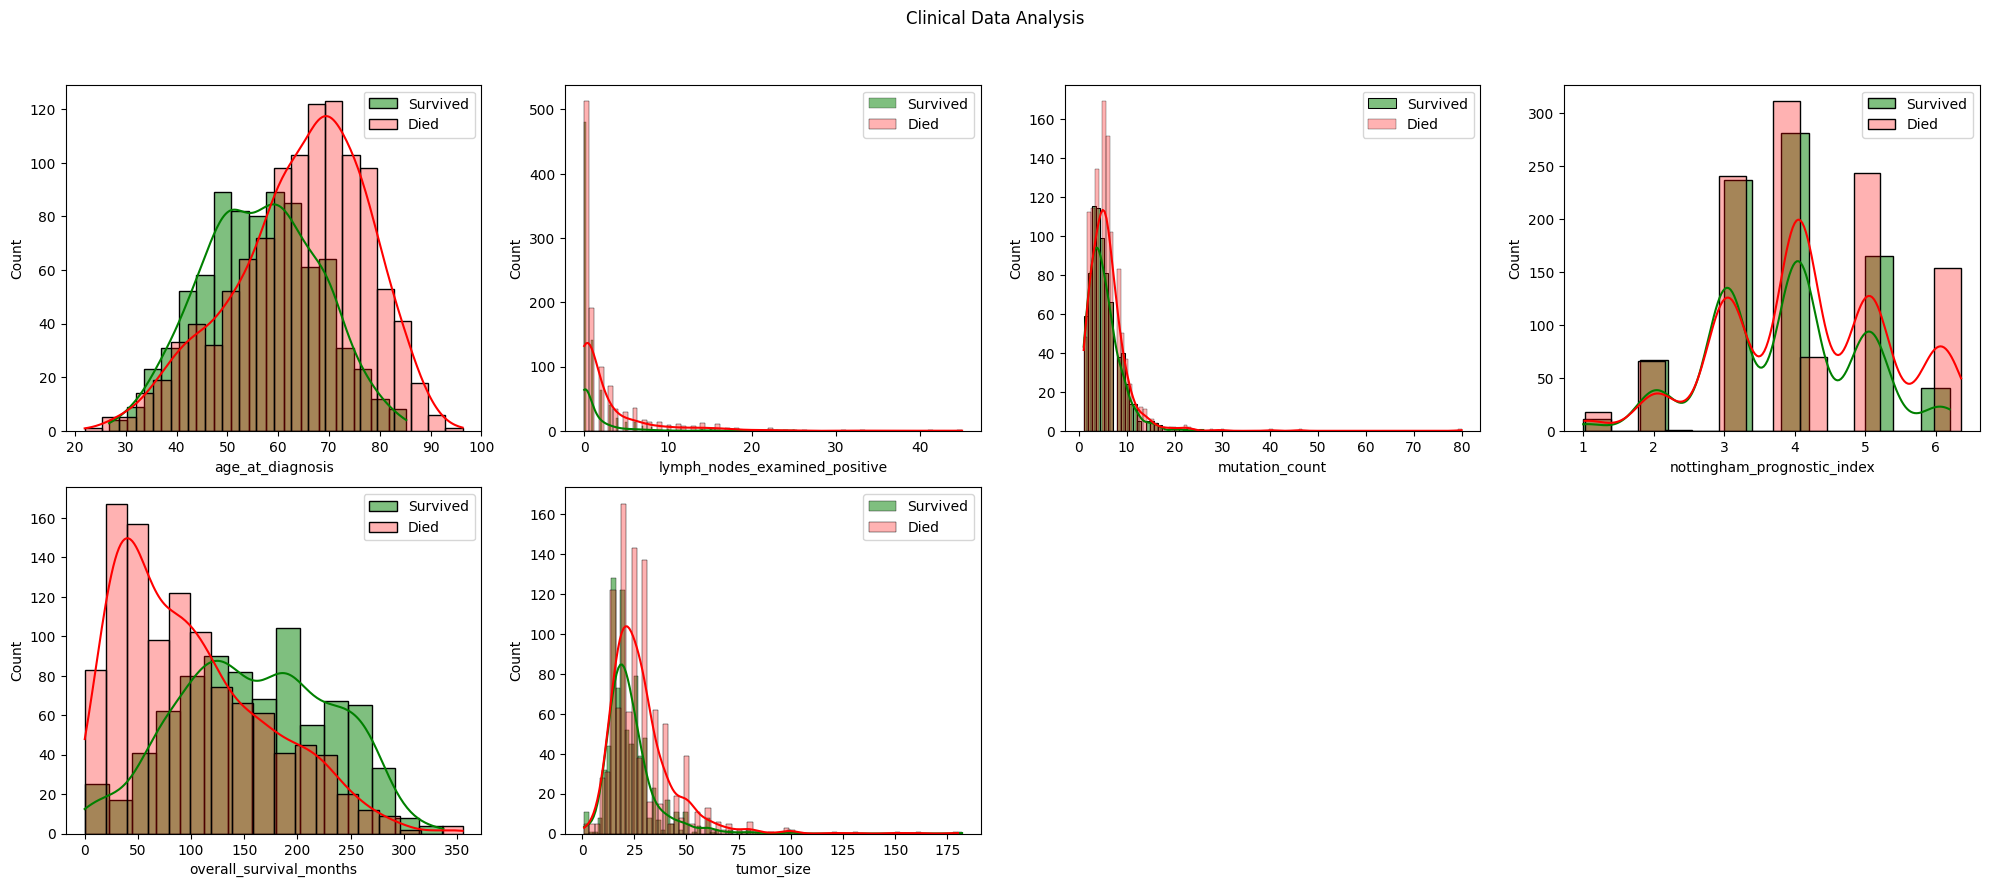

In [13]:
fig = plt.figure(figsize=(20, 25))
j = 0
num_clinical_columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size']
for i in num_clinical_columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.histplot(df_clinical[i][df_clinical['overall_survival'] == 1], color='g', label='Survived', kde=True, alpha=0.5)
    sns.histplot(df_clinical[i][df_clinical['overall_survival'] == 0], color='r', label='Died', kde=True, alpha=0.3)
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()



Relationship between tumor_size, tumor_stage:
Most survived patient showed lower tumor size as well as tumor-stage indicating early diagnosis as an important factor.

<function matplotlib.pyplot.show(close=None, block=None)>

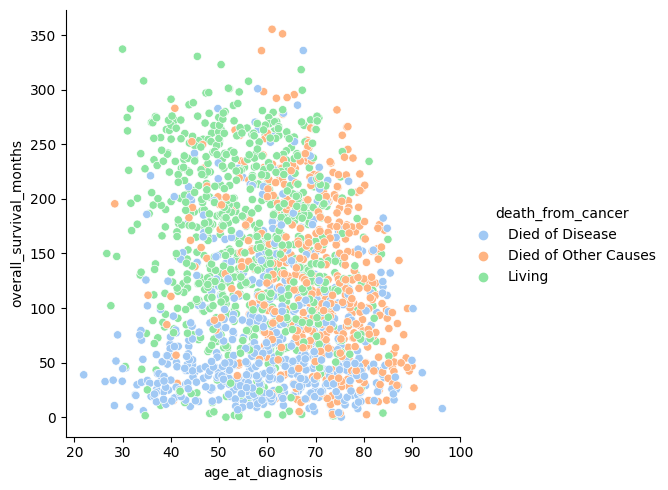

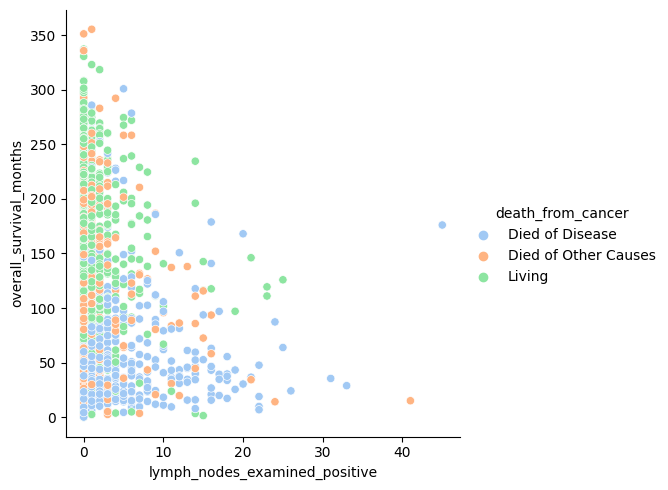

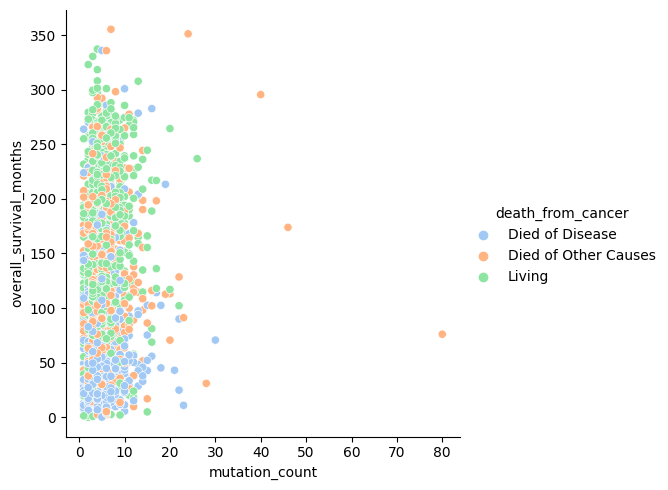

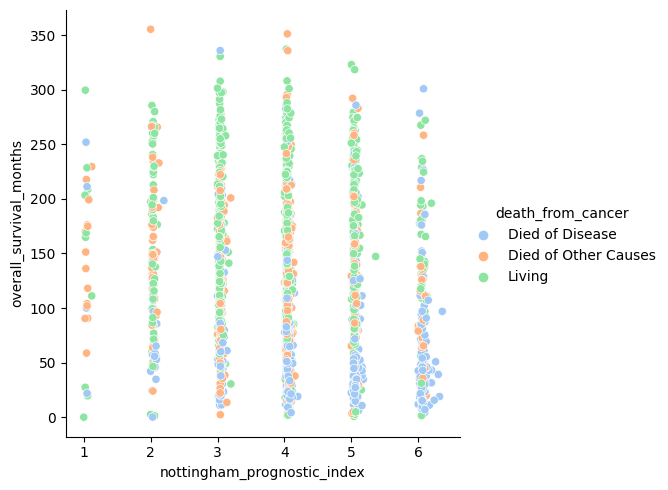

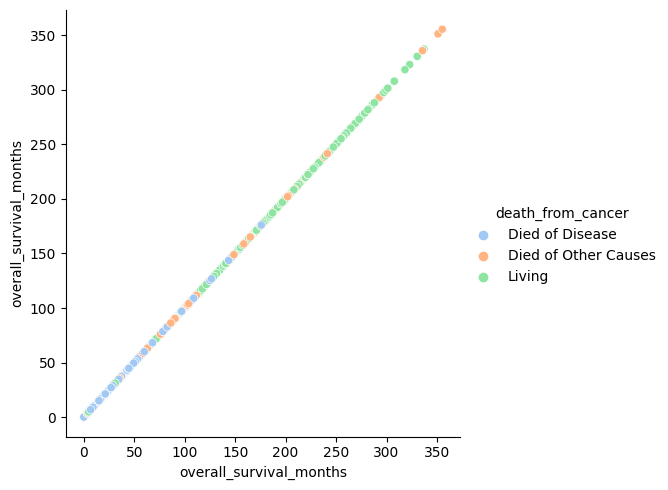

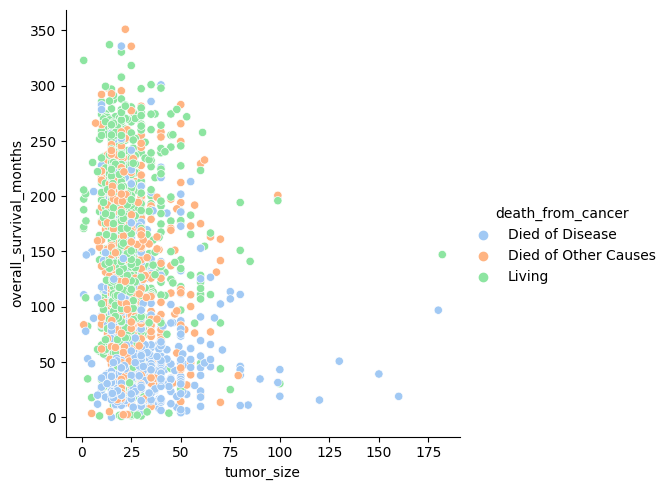

In [14]:
sns.set_palette("pastel")
for variables in num_clinical_columns:
    sns.relplot(data=df_clinical, x=variables, y="overall_survival_months", hue="death_from_cancer")
plt.show

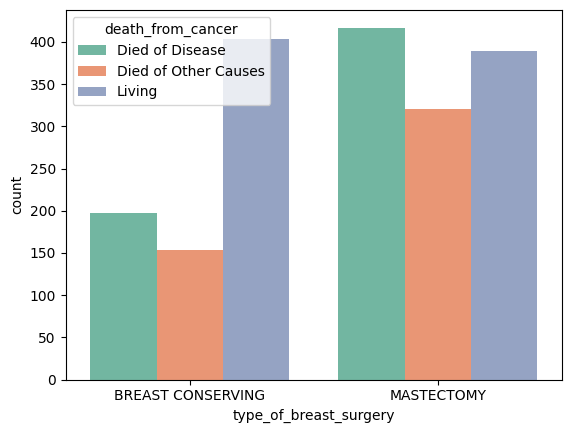

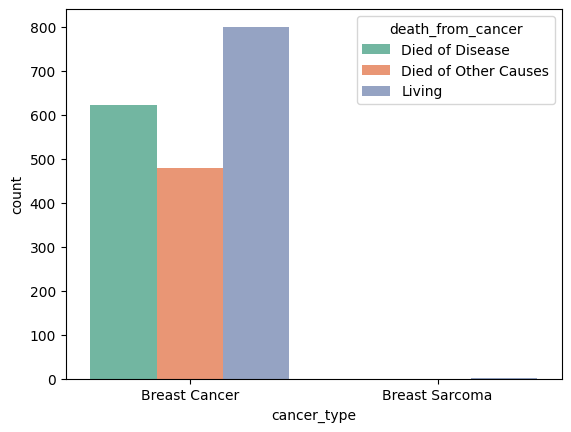

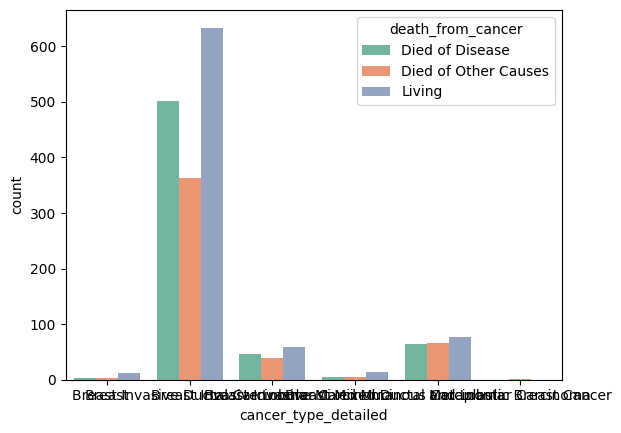

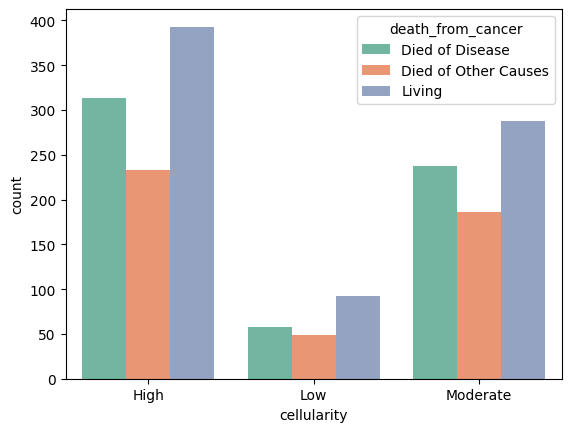

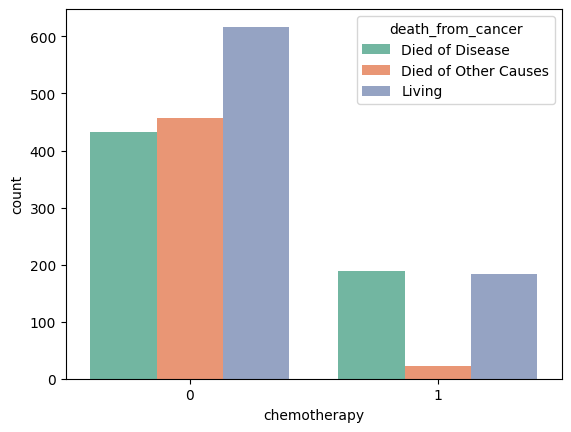

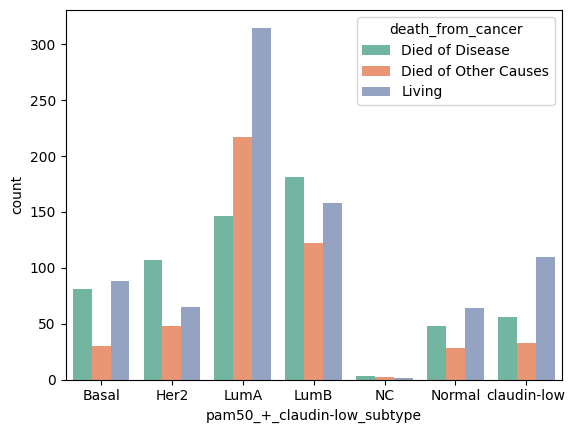

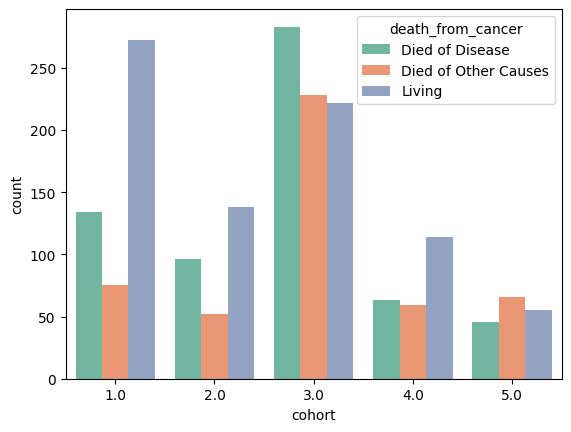

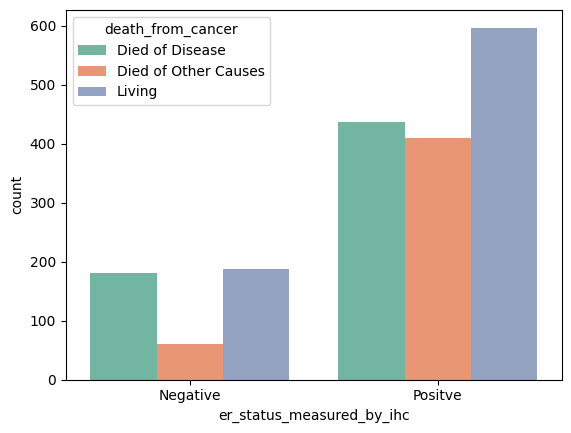

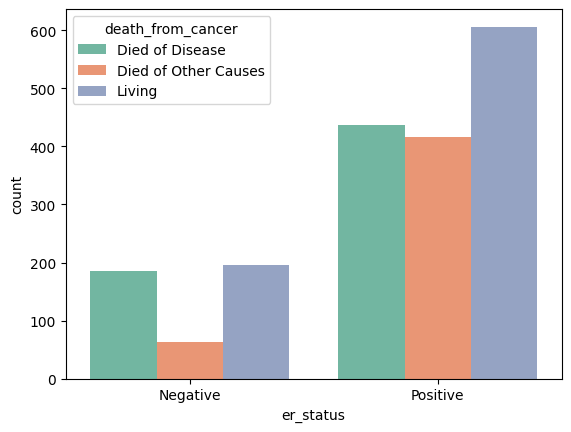

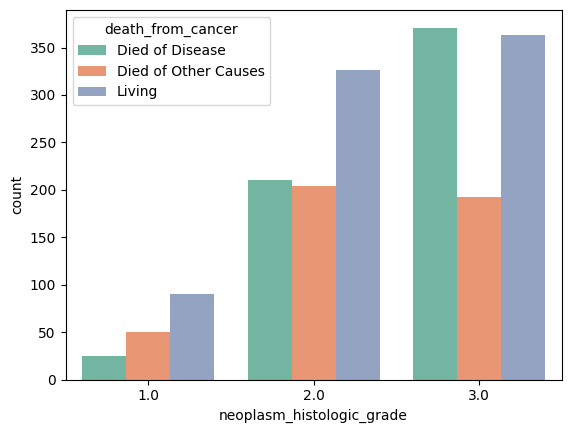

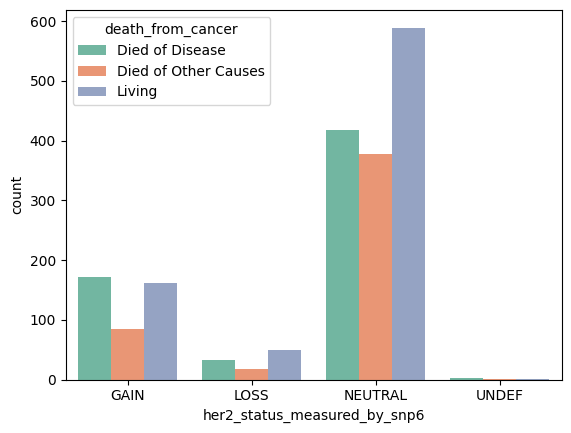

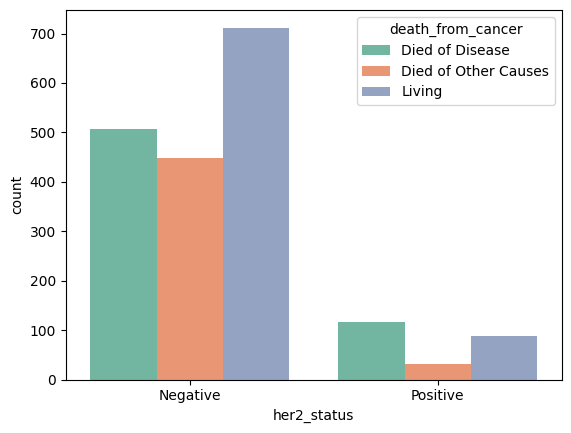

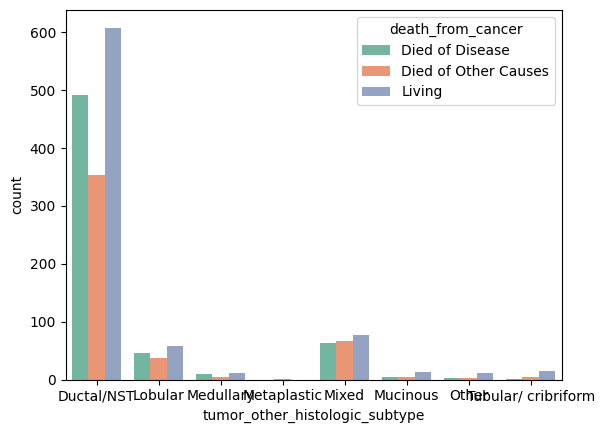

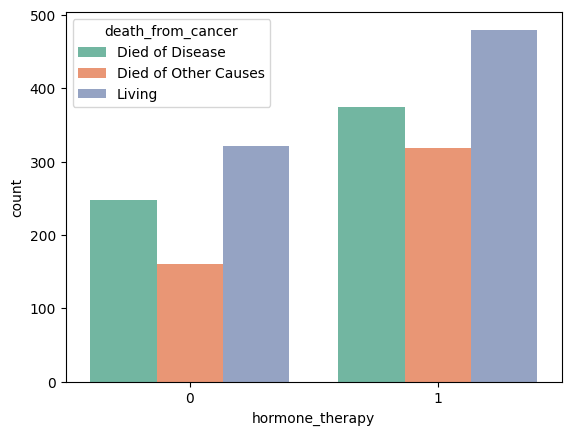

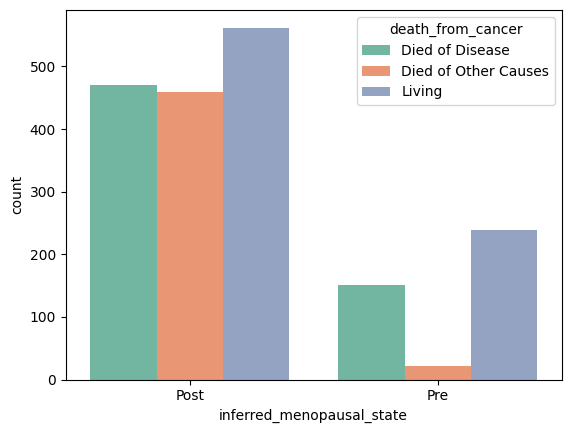

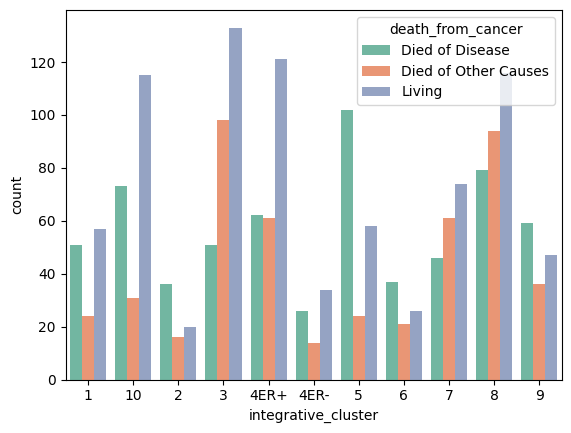

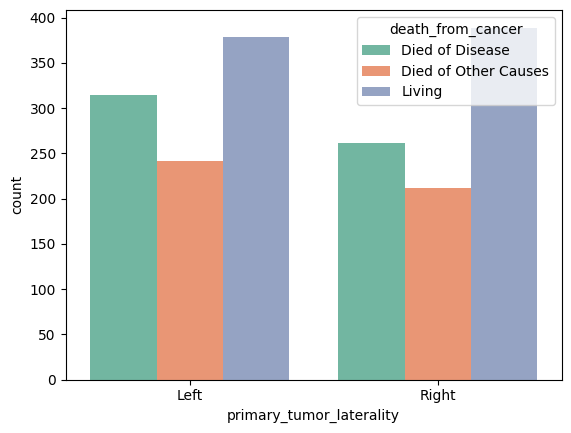

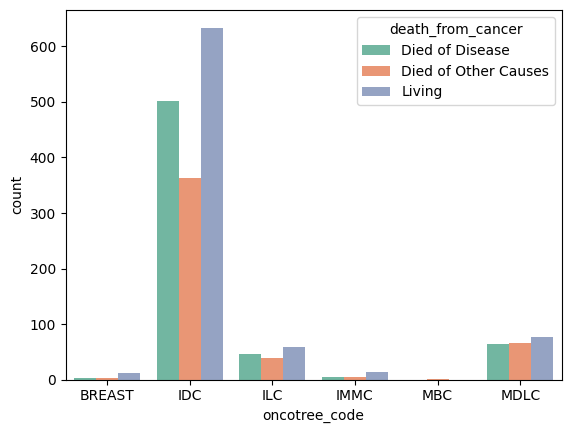

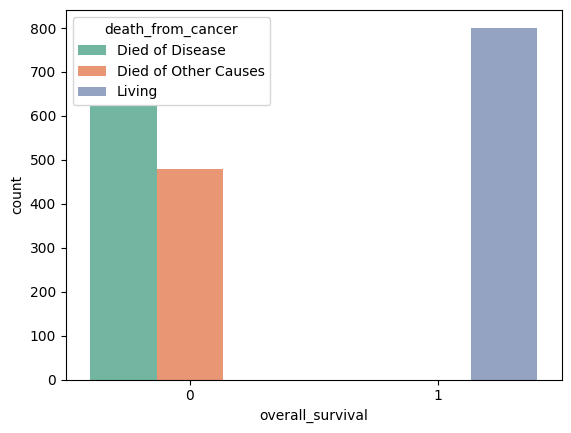

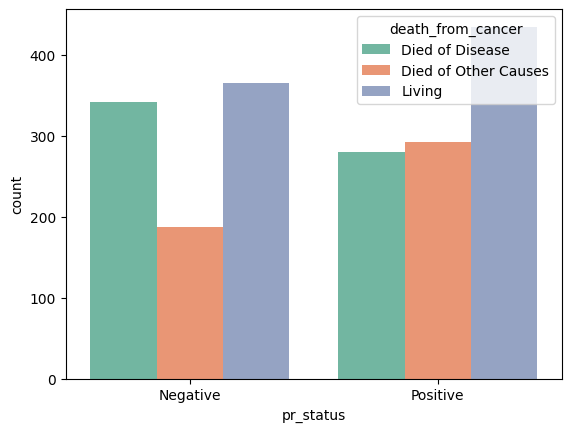

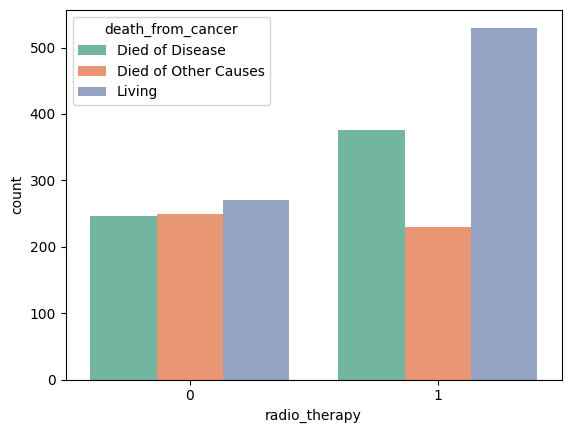

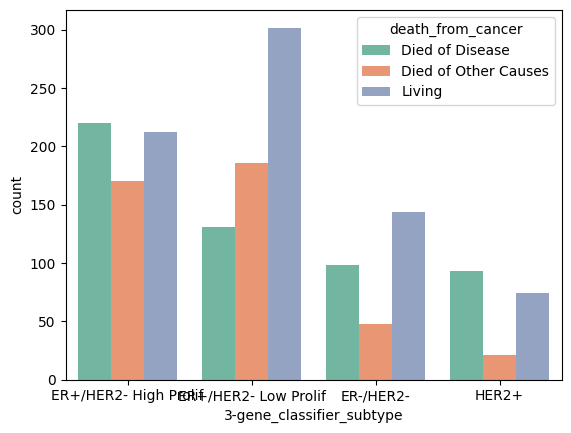

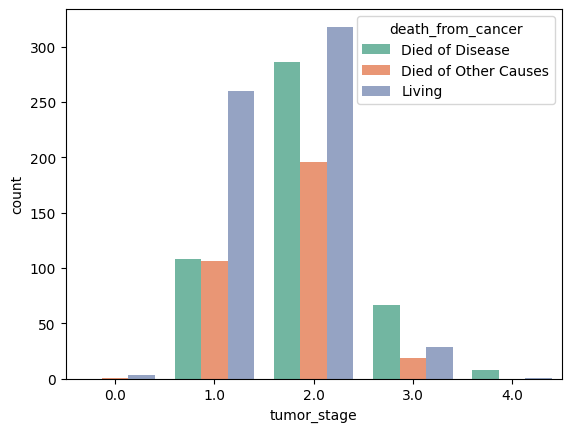

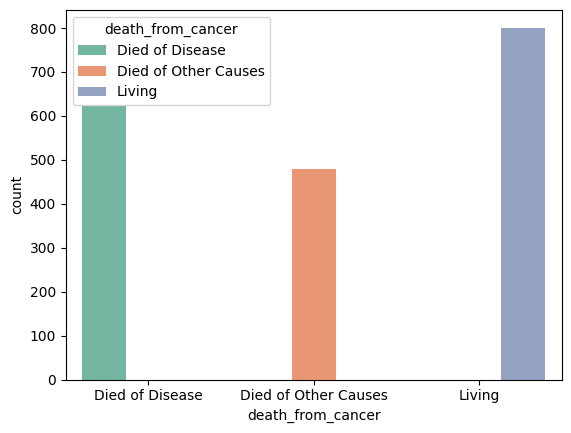

In [15]:

sns.set_palette("Set2")
for variables in categorical_variables:
    sns.countplot(data=df_clinical, x=variables, hue="death_from_cancer")
    plt.show()




    

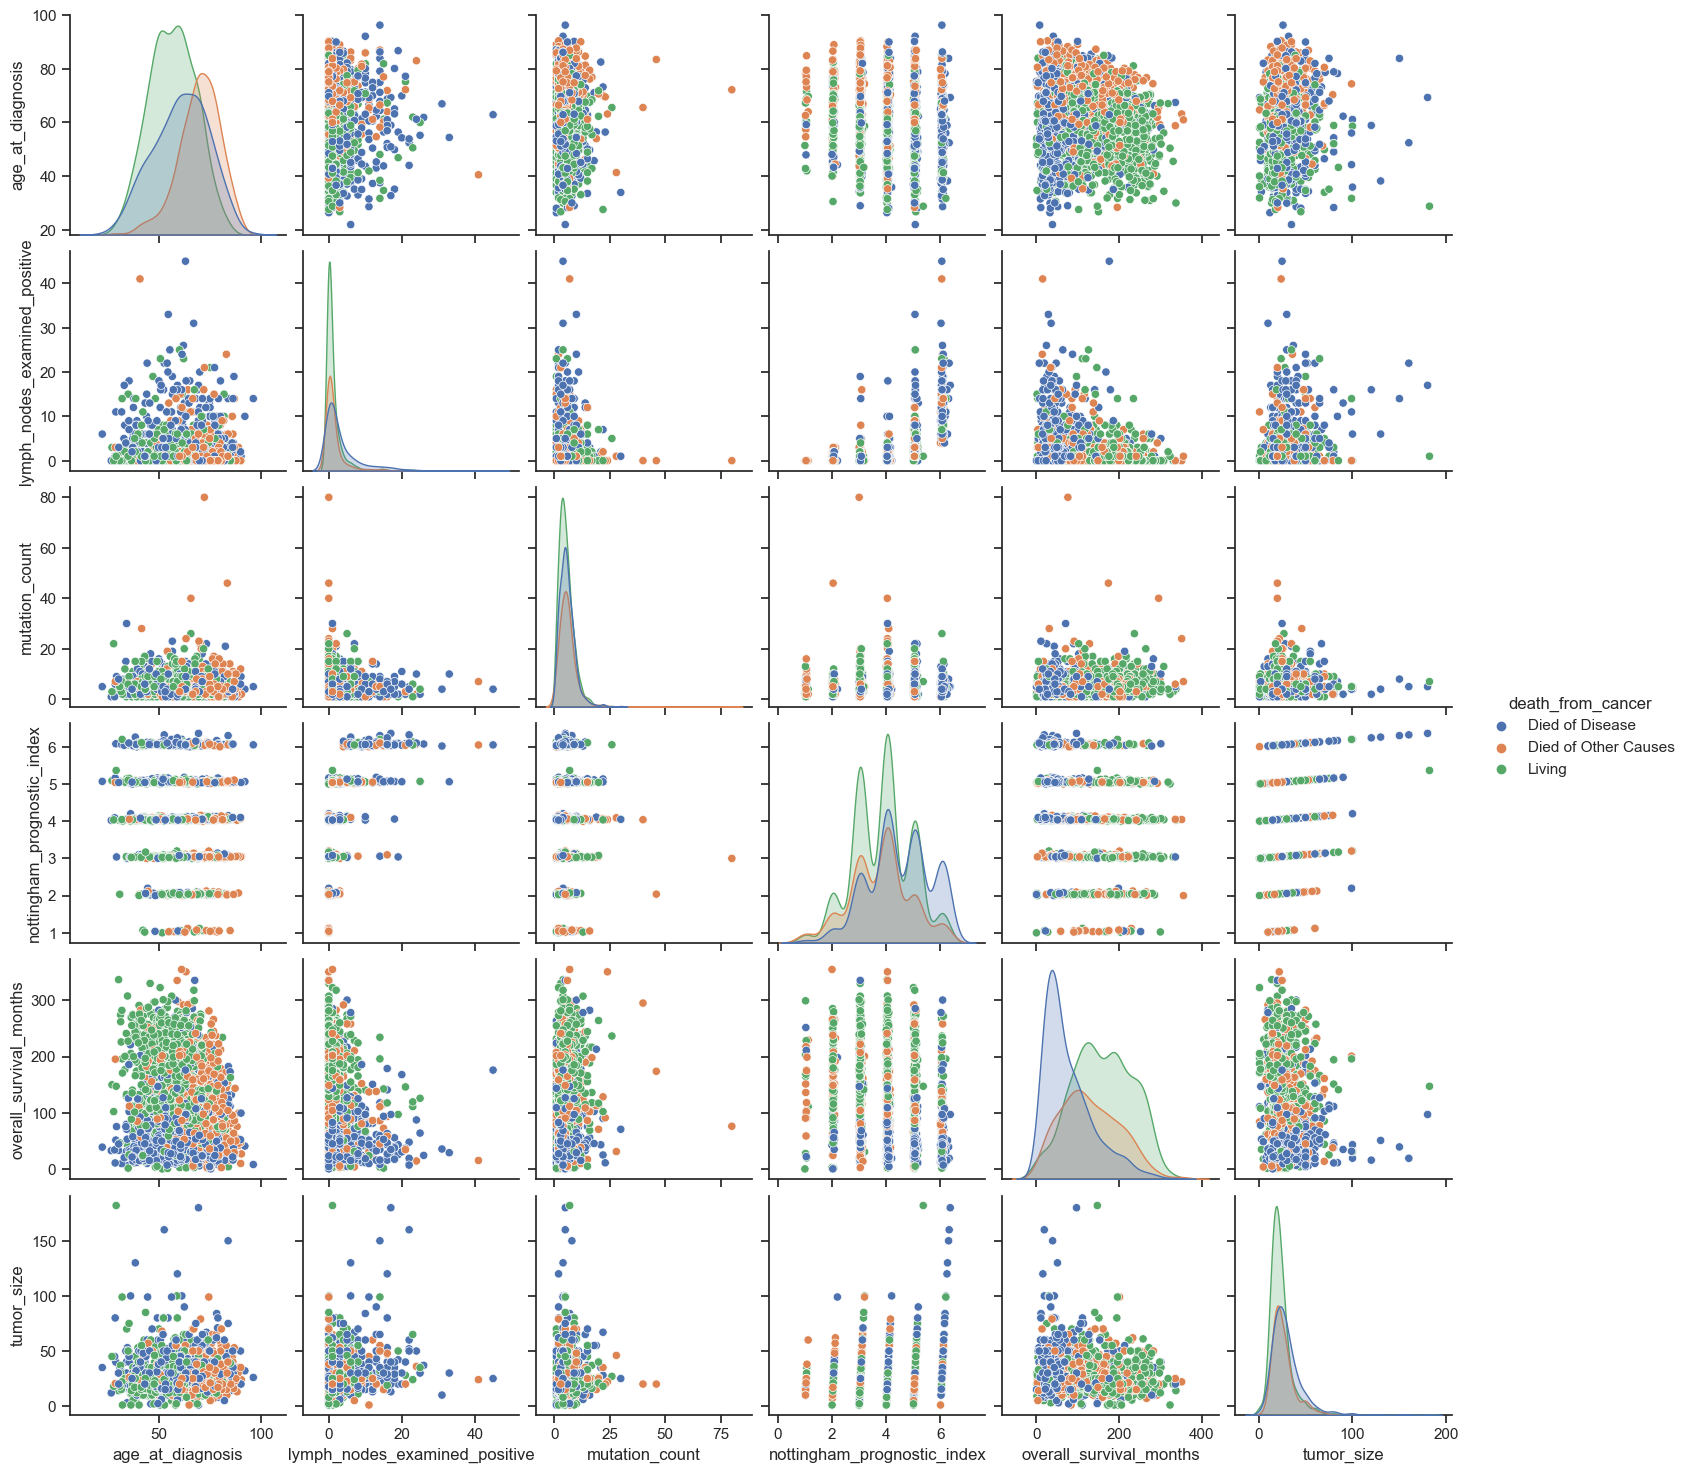

In [16]:
sns.set_theme(style="ticks")

sns.pairplot(df_clinical, hue="death_from_cancer")

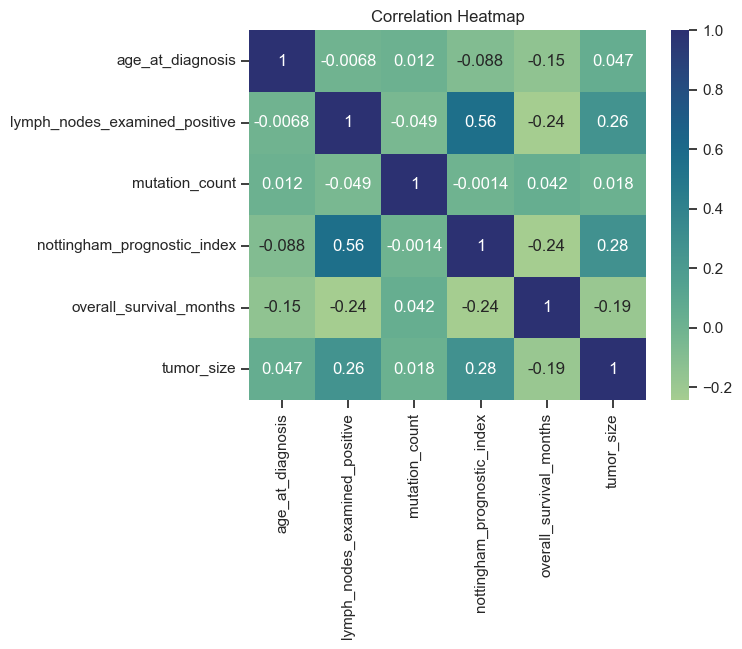

In [17]:
#correlation
correlation_matrix = df_clinical.corr()

# Generate a heatmap of the correlation matrix

sns.heatmap(data=correlation_matrix, annot=True, cmap="crest")

# Set the plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

The Nottingham Prognostic Index (NPI) is a prognostic tool used in breast cancer to assess the likelihood of disease recurrence and predict patient outcomes. It takes into account the following factors:

Tumor Size: The size of the primary tumor is measured in millimeters. Larger tumor size is generally associated with a higher risk of recurrence.

Lymph Node Involvement: It considers whether the cancer has spread to the nearby lymph nodes. The presence of lymph node involvement is associated with a higher risk of recurrence.

Histological Grade: The histological grade is a measure of how closely the tumor resembles normal breast tissue under a microscope. It assesses the level of tumor differentiation. The NPI typically uses a three-tier grading system (Grade 1, 2, or 3) to determine the aggressiveness of the tumor. Higher-grade tumors are associated with a higher risk of recurrence.

The NPI combines these three factors into a single index to provide a prognostic assessment. The formula for calculating the NPI is:

NPI = (0.2 x tumor size) + (0.4 x lymph node status) + (0.6 x histological grade)

In [18]:
print(categorical_variables)
print(df_clinical.columns)


['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_stage', 'death_from_cancer']
Index(['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type',
       'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_ex

In [19]:
cat_df=df_clinical.drop(columns= num_clinical_columns)
cat_df.head     

<bound method NDFrame.head of      type_of_breast_surgery    cancer_type  \
0                MASTECTOMY  Breast Cancer   
1         BREAST CONSERVING  Breast Cancer   
2                MASTECTOMY  Breast Cancer   
3                MASTECTOMY  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1899      BREAST CONSERVING  Breast Cancer   
1900             MASTECTOMY  Breast Cancer   
1901             MASTECTOMY  Breast Cancer   
1902             MASTECTOMY  Breast Cancer   
1903      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN            0   
1              Breast Invasive Ductal Carcinoma        High            0   
2              Breast Invasive Ductal Carcinoma        High            1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate            1   
4     Breast Mixed Ductal and Lobular

In [ ]:
report = pandas_profiling.ProfileReport(df_clinical)

report.to_file('report.html')
report

creating a new data framefor all the treatments, taking the type_of breast surgery as mainly as masectomy.

In [20]:

treatmentList = ["type_of_breast_surgery", "chemotherapy", "hormone_therapy", "radio_therapy"] 
dfTreatments = df_clinical[treatmentList].copy()  # Create a copy of the DataFrame

dfTreatments.loc[:, "type_of_breast_surgery"] = dfTreatments["type_of_breast_surgery"].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)
dfTreatments.head()


type_of_breast_surgery chemotherapy hormone_therapy radio_therapy
0                      1            0               1             1
1                      0            0               1             1
2                      1            1               1             0
3                      1            1               1             1
4                      1            1               1             1

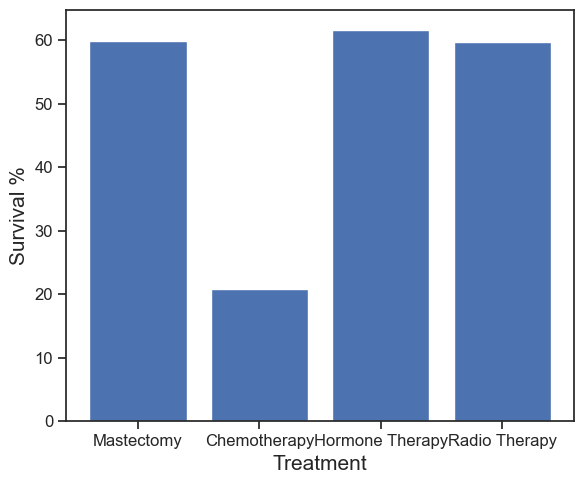

In [21]:
#Get the overall survival % in 100%. 
dfTreatments.rename(columns={"type_of_breast_surgery": "Mastectomy", "chemotherapy": "Chemotherapy", "hormone_therapy": "Hormone Therapy", "radio_therapy": "Radio Therapy"}, inplace=True)
mastectomyCounts = (dfTreatments["Mastectomy"].value_counts()[1]/dfTreatments["Mastectomy"].value_counts().sum())*100
chemoCounts = (dfTreatments["Chemotherapy"].value_counts()[1]/dfTreatments["Chemotherapy"].value_counts().sum())*100
hormoneCounts = (dfTreatments["Hormone Therapy"].value_counts()[1]/dfTreatments["Hormone Therapy"].value_counts().sum())*100
radioCounts = (dfTreatments["Radio Therapy"].value_counts()[1]/dfTreatments["Radio Therapy"].value_counts().sum())*100

#Dictionary of the survival % for each treatment 
treatmentSurvivalDict = {'Mastectomy': mastectomyCounts, 'Chemotherapy': chemoCounts, 'Hormone Therapy':hormoneCounts, 'Radio Therapy': radioCounts}
#Plot of each treatment 
plt.figure(figsize=(6,5))
plt.bar(list(treatmentSurvivalDict.keys()), list(treatmentSurvivalDict.values()))
plt.xlabel("Treatment", fontsize=15)
plt.ylabel("Survival %", fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

In [ ]:
report_treatment = pandas_profiling.ProfileReport(dfTreatments)

report_treatment.to_file('report.html')
report_treatment

Genetic Data analysis

In [22]:
df_genetic =data.iloc[:, 31:520]
df_genetic.head()


brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
0 -1.3990 -0.5738 -1.6217  1.4524  0.3504  1.1517  0.0348  0.1266 -0.8361   
1 -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
2  0.0670 -0.8426  0.2114 -0.3326  0.5141 -0.0803  1.1398  0.4187 -0.4030   
3  0.6744 -0.5428 -1.6592  0.6369  1.6708 -0.8880  1.2491 -1.1889 -0.4174   
4  1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   

      nf1  ...  srd5a1  srd5a2  srd5a3     st7    star    tnk2   tulp4  \
0 -0.8578  ... -1.1877 -0.0194 -1.6345 -0.2142 -0.5698 -1.1741 -1.4779   
1 -2.6059  ... -0.4412  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538   
2 -1.1305  ... -0.5381  0.0668  0.8344  1.7227  0.4024 -3.7172 -1.5538   
3 -0.6165  ... -0.5630 -0.7078  0.8228  0.6819 -0.1948 -2.3286 -0.9924   
4 -0.2940  ... -0.5845 -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   

   ugt2b15  ugt2b17  ugt2b7  
0  -0.5954  -0.8847 -0.3354  
1  -0.2264   0.5398 -0.8920  
2   1.3701  -0.1078  0.3655  
3  -0.3154   0.2320 -0.4828  
4   5.0048   3.8476  1.3223  

[5 rows x 489 columns]

In [23]:
df_genetic.describe()

brca1         brca2         palb2          pten          tp53  \
count  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03   
mean  -6.302521e-07 -4.201681e-07  3.676471e-07 -8.928571e-07  6.302521e-07   
std    1.000262e+00  1.000262e+00  1.000263e+00  1.000263e+00  1.000263e+00   
min   -2.444400e+00 -2.783500e+00 -4.384600e+00 -5.932800e+00 -2.481200e+00   
25%   -7.198500e-01 -6.994750e-01 -6.798250e-01 -5.586500e-01 -6.661500e-01   
50%   -1.244500e-01 -5.820000e-02 -2.210000e-02  1.098500e-01 -3.010000e-02   
75%    5.532250e-01  6.290000e-01  6.400000e-01  6.426250e-01  6.447500e-01   
max    4.554200e+00  3.737900e+00  4.615000e+00  3.254100e+00  4.289800e+00   

                atm         cdh1         chek2           nbn          nf1  \
count  1.904000e+03  1904.000000  1.904000e+03  1.904000e+03  1904.000000   
mean  -2.100840e-07     0.000002  7.463684e-18 -3.676471e-07    -0.000001   
std    1.000262e+00     1.000263  1.000262e+00  1.000263e+00     1.000262   
min   -3.170500e+00    -3.323700 -2.688700e+00 -3.689800e+00    -2.968600   
25%   -6.602250e-01    -0.458600 -7.385500e-01 -6.667750e-01    -0.683925   
50%   -4.200000e-03     0.115550 -1.311000e-01 -1.445000e-02    -0.054800   
75%    6.901500e-01     0.649800  5.431250e-01  6.387250e-01     0.668925   
max    3.824200e+00     2.820900  4.538200e+00  5.371300e+00     6.178600   

       ...        srd5a1        srd5a2        srd5a3           st7  \
count  ...  1.904000e+03  1.904000e+03  1.904000e+03  1.904000e+03   
mean   ...  4.726891e-07 -3.676471e-07 -9.453782e-07 -1.050420e-07   
std    ...  1.000263e+00  1.000262e+00  1.000262e+00  1.000263e+00   
min    ... -2.120800e+00 -3.364800e+00 -2.719400e+00 -4.982700e+00   
25%    ... -6.188500e-01 -6.104750e-01 -6.741750e-01 -6.136750e-01   
50%    ... -2.456500e-01 -4.690000e-02 -1.422500e-01 -5.175000e-02   
75%    ...  3.306000e-01  5.144500e-01  5.146000e-01  5.787750e-01   
max    ...  6.534900e+00  1.027030e+01  6.329000e+00  4.571300e+00   

              star          tnk2         tulp4       ugt2b15      ugt2b17  \
count  1904.000000  1.904000e+03  1.904000e+03  1.904000e+03  1904.000000   
mean     -0.000002  3.676471e-07  4.726891e-07  7.878151e-07     0.000000   
std       1.000262  1.000264e+00  1.000262e+00  1.000263e+00     1.000262   
min      -2.981700 -3.833300e+00 -3.609300e+00 -1.166900e+00    -2.112600   
25%      -0.632900 -6.664750e-01 -7.102000e-01 -5.058250e-01    -0.476200   
50%      -0.026650  7.000000e-04 -2.980000e-02 -2.885500e-01    -0.133400   
75%       0.590350  6.429000e-01  5.957250e-01  6.022500e-02     0.270375   
max      12.742300  3.938800e+00  3.833400e+00  1.088490e+01    12.643900   

             ugt2b7  
count  1.904000e+03  
mean   3.731842e-18  
std    1.000262e+00  
min   -1.051600e+00  
25%   -7.260000e-01  
50%   -4.248000e-01  
75%    4.284000e-01  
max    3.284400e+00  

[8 rows x 489 columns]

In [24]:
df_genetic.isnull().sum().sort_values(ascending = False)


brca1      0
ctnna3     0
ctcf       0
col6a3     0
col22a1    0
          ..
fas        0
erbb4      0
erbb3      0
erbb2      0
ugt2b7     0
Length: 489, dtype: int64

There is no missing value in the genetic data

In [ ]:
df_genetic.duplicated().sum

brca1       brca2       palb2        pten        tp53         atm  \
count  489.000000  489.000000  489.000000  489.000000  489.000000  489.000000   
mean    -0.006571    0.013869   -0.005872   -0.002427    0.013818    0.002747   
std      0.139574    0.093777    0.117754    0.149411    0.084464    0.063994   
min     -0.385760   -0.183001   -0.327741   -0.431531   -0.164072   -0.119485   
25%     -0.080025   -0.040886   -0.075807   -0.086695   -0.034468   -0.029982   
50%      0.000424    0.006065   -0.013443   -0.010629    0.001922    0.000702   
75%      0.066944    0.057032    0.054143    0.074205    0.055795    0.032613   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             cdh1       chek2         nbn         nf1  ...      srd5a1  \
count  489.000000  489.000000  489.000000  489.000000  ...  489.000000   
mean    -0.001656    0.009968    0.007320    0.002712  ...    0.018125   
std      0.108344    0.172324    0.066049    0.128992  ...    0.163513   
min     -0.290569   -0.389868   -0.156060   -0.319499  ...   -0.532074   
25%     -0.065388   -0.092348   -0.024894   -0.084552  ...   -0.066398   
50%      0.001076   -0.003569   -0.000857   -0.006604  ...    0.009420   
75%      0.059097    0.106452    0.028234    0.082705  ...    0.095988   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           srd5a2      srd5a3         st7        star        tnk2       tulp4  \
count  489.000000  489.000000  489.000000  489.000000  489.000000  489.000000   
mean     0.011430    0.001804   -0.020586   -0.000068   -0.005989   -0.003457   
std      0.068669    0.109627    0.141704    0.061130    0.199393    0.132624   
min     -0.111486   -0.268865   -0.429136   -0.113223   -0.499819   -0.343154   
25%     -0.029263   -0.065357   -0.107936   -0.030054   -0.141221   -0.092270   
50%      0.006715   -0.007465   -0.026250   -0.002572   -0.025948   -0.008117   
75%      0.042817    0.061785    0.055382    0.027762    0.122172    0.070488   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          ugt2b15     ugt2b17      ugt2b7  
count  489.000000  489.000000  489.000000  
mean    -0.007162   -0.005544   -0.003346  
std      0.088846    0.063859    0.086479  
min     -0.175743   -0.100506   -0.235125  
25%     -0.057744   -0.037574   -0.044574  
50%     -0.012390   -0.012095   -0.009097  
75%      0.029643    0.014807    0.027191  
max      1.000000    1.000000    1.000000  

[8 rows x 489 columns]

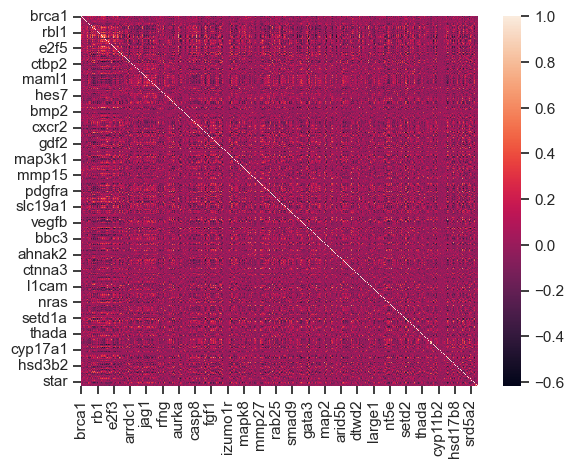

In [25]:
correlation_matrix = df_genetic.corr()
sns.heatmap(correlation_matrix)
correlation_matrix.describe()

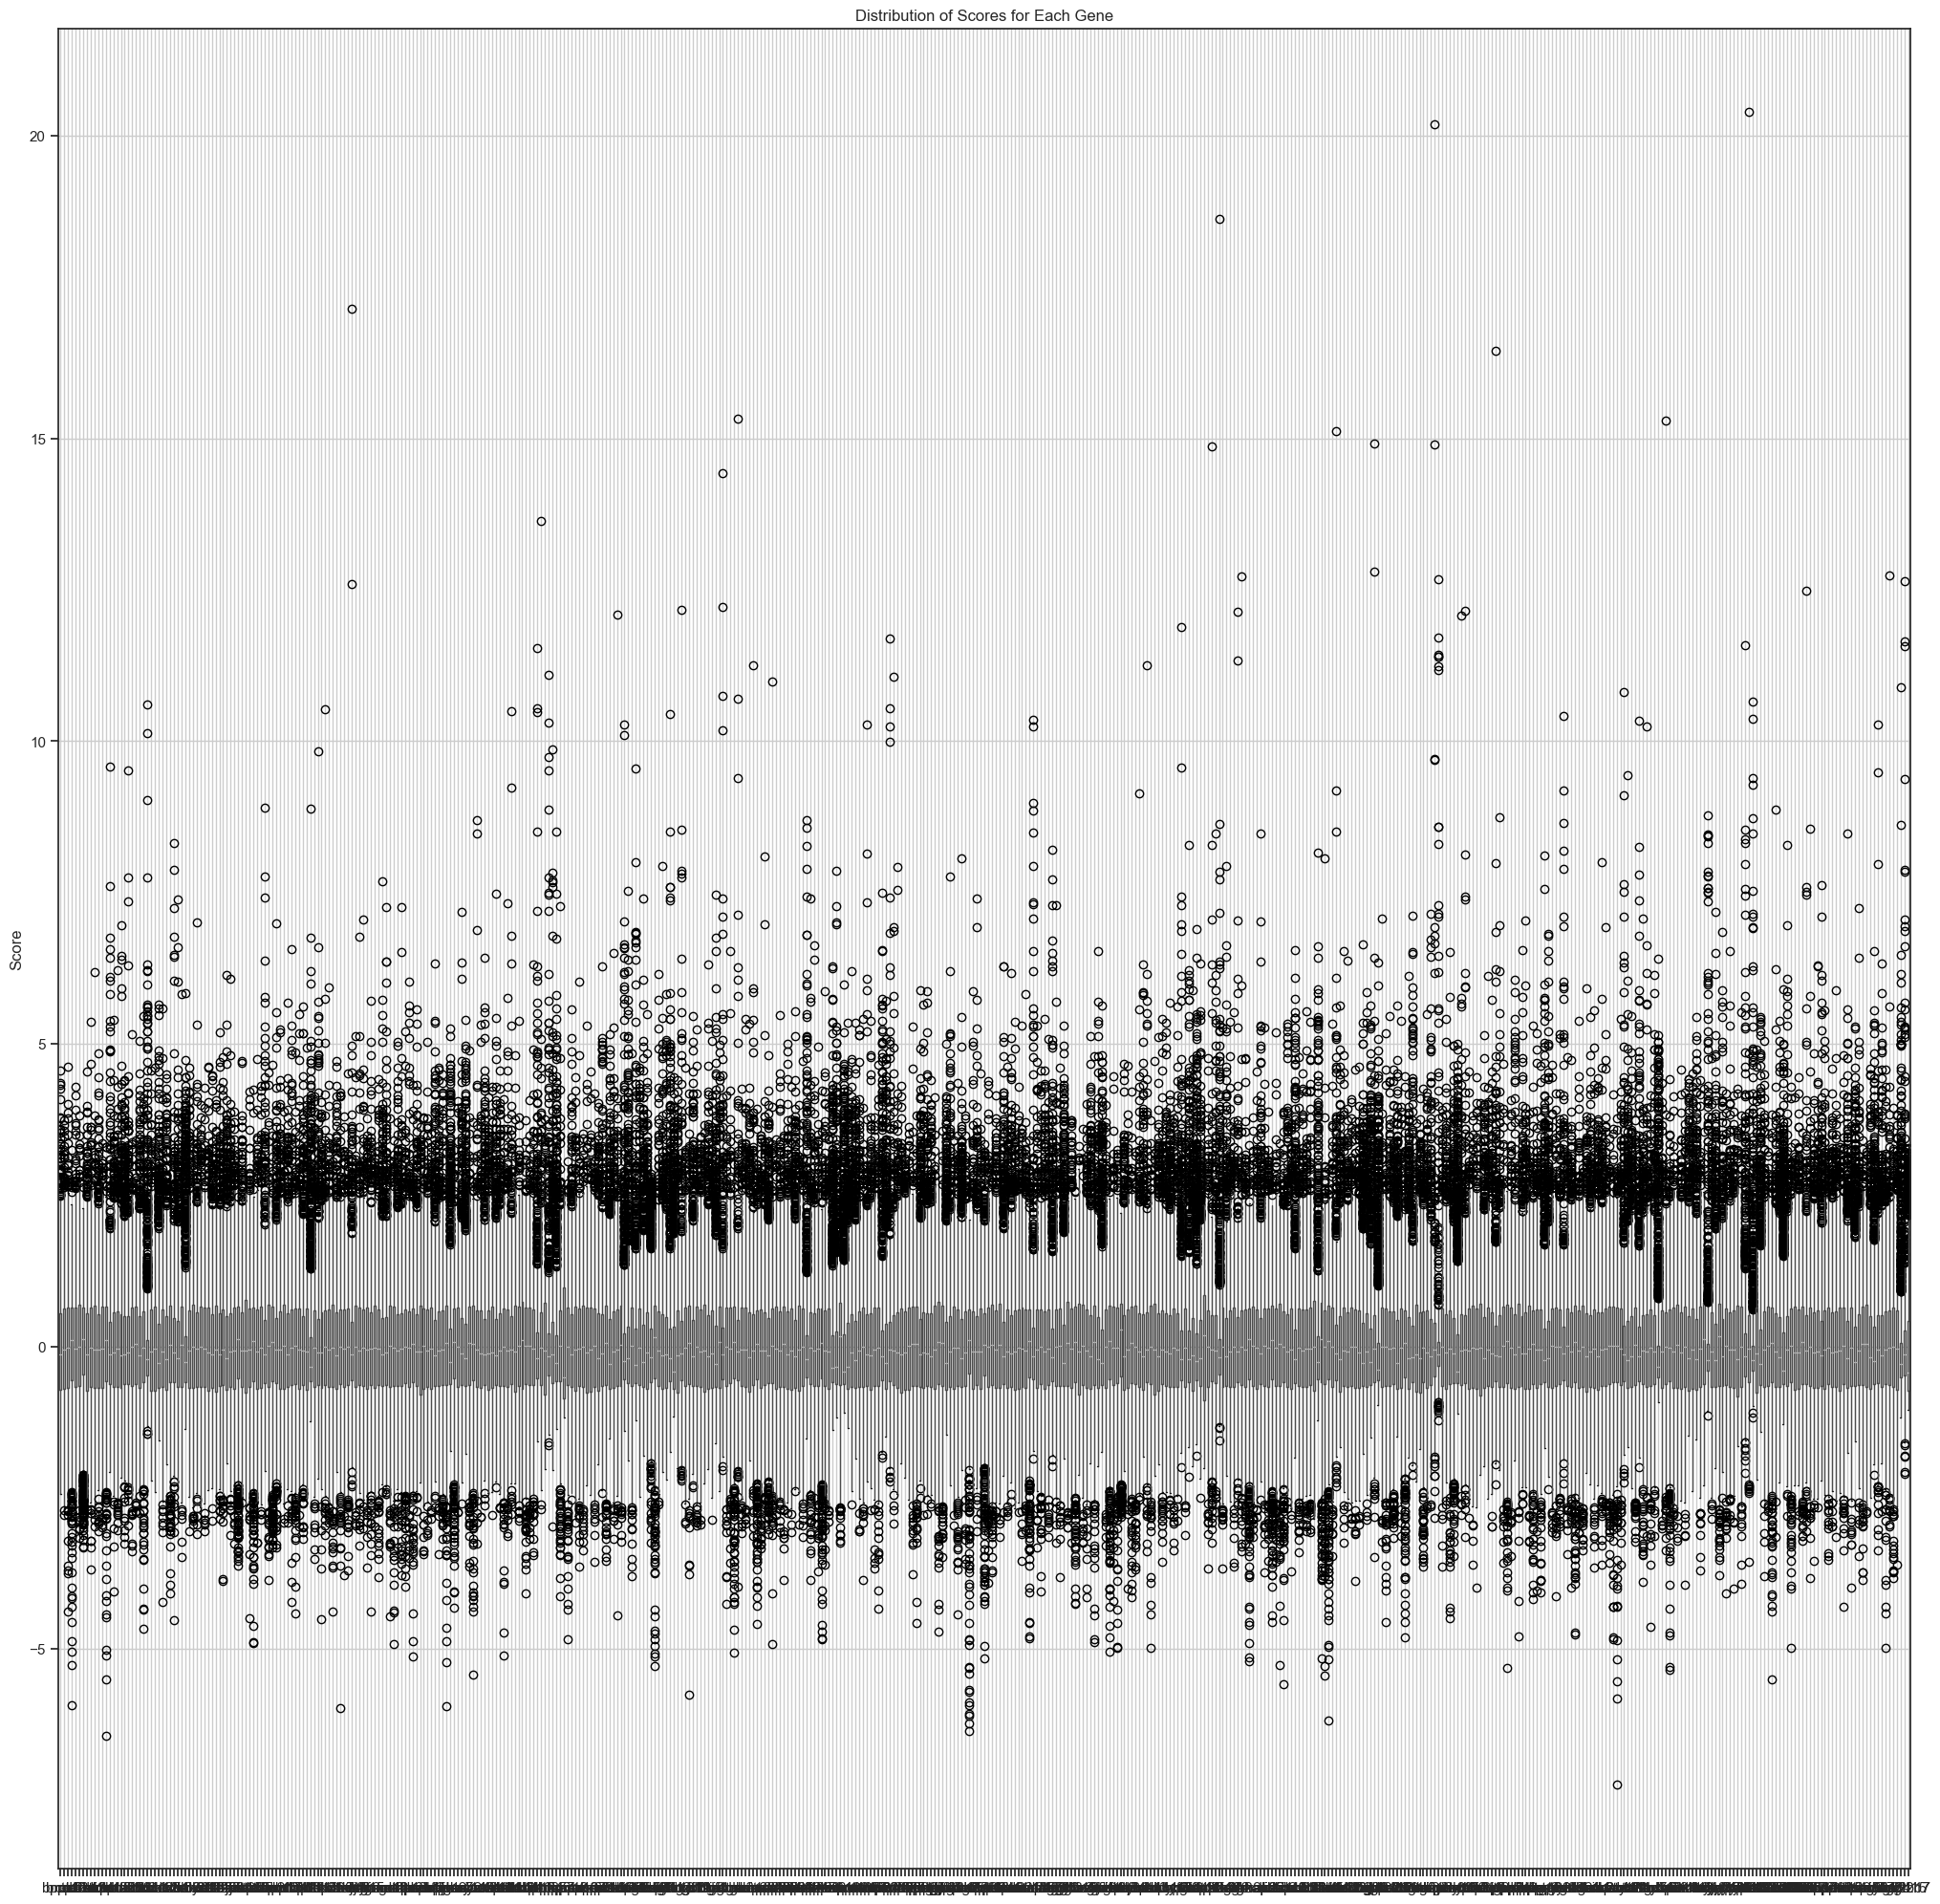

In [26]:
df_genetic.boxplot(figsize=(25,25))

plt.ylabel('Score')
plt.title('Distribution of Scores for Each Gene')
plt.show()

In [27]:
df_genetic.max().sort_values()

mmp11      2.0014
gata3      2.2028
erbb3      2.2761
col6a3     2.2869
mapt       2.3416
           ...   
nrg3      16.4499
hes5      17.1431
tubb4a    18.6351
lipi      20.1984
cyp3a7    20.3950
Length: 489, dtype: float64

In [ ]:
df_genetic.min().sort_values()

In [28]:
# Find the 5 genes with the highest expression levels
top_5_high_expression = df_genetic.mean().nlargest(5)
print("Genes with the highest expression levels:")
print(top_5_high_expression)

# Find the 5 genes with the lowest expression levels
top_5_low_expression = df_genetic.mean().nsmallest(5)
print("Genes with the lowest expression levels:")
print(top_5_low_expression)

Genes with the highest expression levels:
nfkb2     0.000002
rad51c    0.000002
pdgfrb    0.000002
jag1      0.000002
psen2     0.000002
dtype: float64
Genes with the lowest expression levels:
ahnak     -0.000003
cyp17a1   -0.000002
nfkb1     -0.000002
gldc      -0.000002
kmt2d     -0.000002
dtype: float64


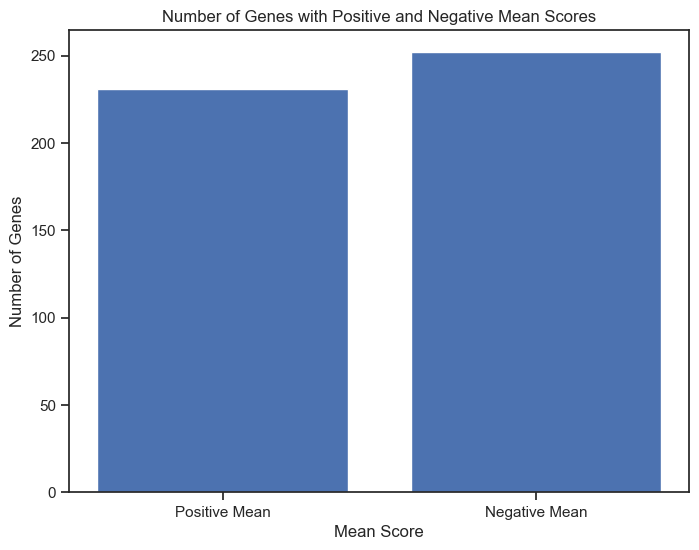

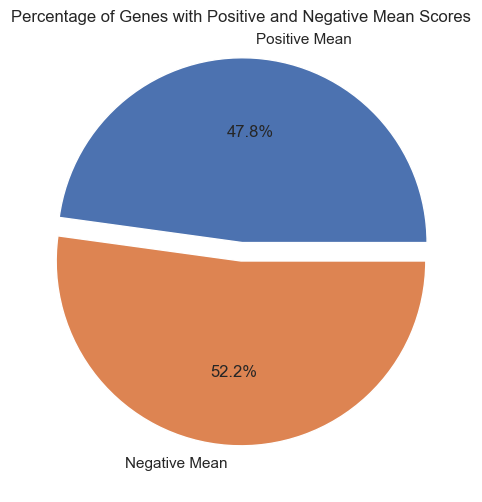

In [30]:
mean_scores = df_genetic.mean()

# Categorize genes based on mean scores
positive_mean_genes = mean_scores[mean_scores > 0].count()
negative_mean_genes = mean_scores[mean_scores < 0].count()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Positive Mean', 'Negative Mean'], [positive_mean_genes, negative_mean_genes])
plt.xlabel('Mean Score')
plt.ylabel('Number of Genes')
plt.title('Number of Genes with Positive and Negative Mean Scores')
plt.show()

# Create a pie plot
labels = ['Positive Mean', 'Negative Mean']
sizes = [positive_mean_genes, negative_mean_genes]
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('Percentage of Genes with Positive and Negative Mean Scores')
plt.show()

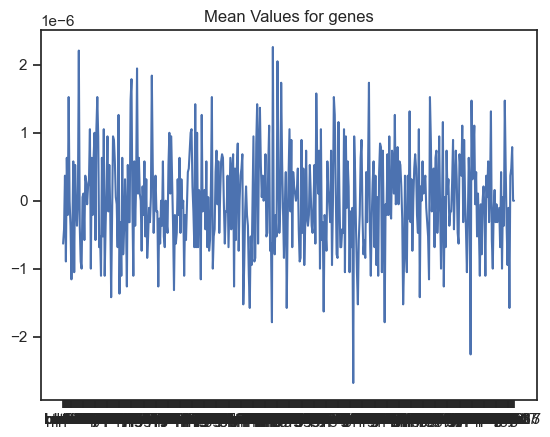

In [31]:

plt.plot(mean_scores)

plt.title('Mean Values for genes')
plt.show()

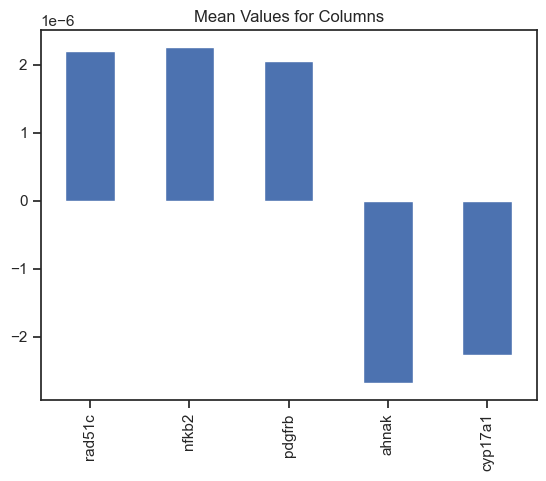

In [32]:
filtered_means = mean_scores[(mean_scores > 2*10**-6) | (mean_scores< -2*10**-6)]

# Step 3: Plot the mean values for the selected columns
filtered_means.plot(kind='bar')

plt.title('Mean Values for Columns')
plt.show()

In [33]:
genetic_and_cat_df= pd.concat([df_genetic,cat_df], axis=1)
genetic_and_cat_df.drop(columns="death_from_cancer")
genetic_and_cat_df.head()

brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
0 -1.3990 -0.5738 -1.6217  1.4524  0.3504  1.1517  0.0348  0.1266 -0.8361   
1 -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
2  0.0670 -0.8426  0.2114 -0.3326  0.5141 -0.0803  1.1398  0.4187 -0.4030   
3  0.6744 -0.5428 -1.6592  0.6369  1.6708 -0.8880  1.2491 -1.1889 -0.4174   
4  1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   

      nf1  ...  inferred_menopausal_state  integrative_cluster  \
0 -0.8578  ...                       Post                 4ER+   
1 -2.6059  ...                        Pre                 4ER+   
2 -1.1305  ...                        Pre                    3   
3 -0.6165  ...                        Pre                    9   
4 -0.2940  ...                       Post                    9   

   primary_tumor_laterality  oncotree_code  overall_survival  pr_status  \
0                     Right            IDC                 1   Negative   
1                     Right            IDC                 1   Positive   
2                     Right            IDC                 0   Positive   
3                     Right           MDLC                 1   Positive   
4                     Right           MDLC                 0   Positive   

   radio_therapy  3-gene_classifier_subtype  tumor_stage  death_from_cancer  
0              1                  ER-/HER2-          2.0             Living  
1              1      ER+/HER2- High Prolif          1.0             Living  
2              0                        NaN          2.0    Died of Disease  
3              1                        NaN          2.0             Living  
4              1      ER+/HER2- High Prolif          2.0    Died of Disease  

[5 rows x 513 columns]

In [34]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

for column in categorical_variables:
    genetic_and_cat_df[column] = label_encoder.fit_transform(genetic_and_cat_df[column])
genetic_and_cat_df.head()

brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
0 -1.3990 -0.5738 -1.6217  1.4524  0.3504  1.1517  0.0348  0.1266 -0.8361   
1 -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
2  0.0670 -0.8426  0.2114 -0.3326  0.5141 -0.0803  1.1398  0.4187 -0.4030   
3  0.6744 -0.5428 -1.6592  0.6369  1.6708 -0.8880  1.2491 -1.1889 -0.4174   
4  1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   

      nf1  ...  inferred_menopausal_state  integrative_cluster  \
0 -0.8578  ...                          0                    4   
1 -2.6059  ...                          1                    4   
2 -1.1305  ...                          1                    3   
3 -0.6165  ...                          1                   10   
4 -0.2940  ...                          0                   10   

   primary_tumor_laterality  oncotree_code  overall_survival  pr_status  \
0                         1              1                 1          0   
1                         1              1                 1          1   
2                         1              1                 0          1   
3                         1              5                 1          1   
4                         1              5                 0          1   

   radio_therapy  3-gene_classifier_subtype  tumor_stage  death_from_cancer  
0              1                          2            2                  2  
1              1                          0            1                  2  
2              0                          4            2                  0  
3              1                          4            2                  2  
4              1                          0            2                  0  

[5 rows x 513 columns]

<AxesSubplot: >

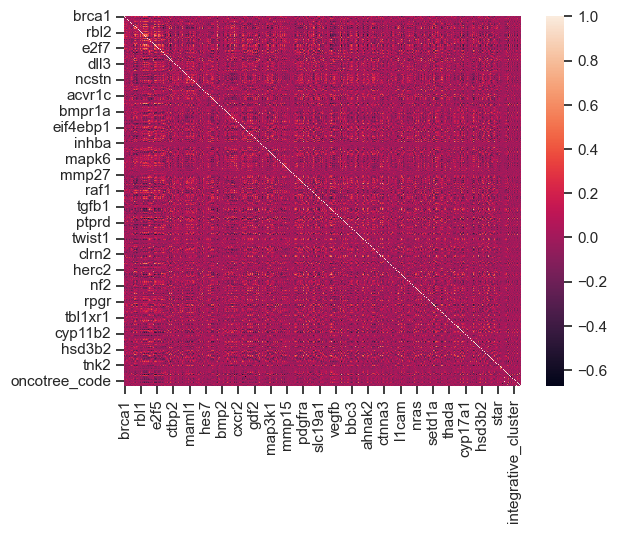

In [35]:
genetic_cat_corr= genetic_and_cat_df.corr()
sns.heatmap(genetic_cat_corr)

ANOVA

In [38]:
genetic_mean_comparion_df= pd.concat([df_genetic,df_clinical[["death_from_cancer"]]],axis=1)
genetic_mean_comparion_df.head()



brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
0 -1.3990 -0.5738 -1.6217  1.4524  0.3504  1.1517  0.0348  0.1266 -0.8361   
1 -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
2  0.0670 -0.8426  0.2114 -0.3326  0.5141 -0.0803  1.1398  0.4187 -0.4030   
3  0.6744 -0.5428 -1.6592  0.6369  1.6708 -0.8880  1.2491 -1.1889 -0.4174   
4  1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   

      nf1  ...  srd5a2  srd5a3     st7    star    tnk2   tulp4  ugt2b15  \
0 -0.8578  ... -0.0194 -1.6345 -0.2142 -0.5698 -1.1741 -1.4779  -0.5954   
1 -2.6059  ...  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538  -0.2264   
2 -1.1305  ...  0.0668  0.8344  1.7227  0.4024 -3.7172 -1.5538   1.3701   
3 -0.6165  ... -0.7078  0.8228  0.6819 -0.1948 -2.3286 -0.9924  -0.3154   
4 -0.2940  ... -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   5.0048   

   ugt2b17  ugt2b7  death_from_cancer  
0  -0.8847 -0.3354             Living  
1   0.5398 -0.8920             Living  
2  -0.1078  0.3655    Died of Disease  
3   0.2320 -0.4828             Living  
4   3.8476  1.3223    Died of Disease  

[5 rows x 490 columns]

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


genetic_mean_comparion_df["death_from_cancer"] = label_encoder.fit_transform(genetic_mean_comparion_df["death_from_cancer"])


Below is to use the death_by_ cancer as a label and classifying the genes using kNN

In [67]:

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split


# Separate features (gene expression values) and target variable
X = genetic_mean_comparion_df.iloc[:, :-1]  # Features
y = genetic_mean_comparion_df['death_from_cancer']  # Target variable

# Encode the target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the classes for test set
y_pred = knn.predict(X_test)

# Decode the predicted classes back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print the predicted classes
print("Predicted classes:")
print(y_pred_decoded)


Predicted classes:
[0 1 0 2 2 0 2 2 0 0 2 0 1 2 2 0 0 0 1 0 0 2 1 1 0 0 0 0 2 2 1 2 0 1 0 1 2
 2 2 0 2 2 2 2 2 1 1 2 0 2 2 0 0 0 2 2 2 1 0 1 0 0 0 0 2 0 2 0 2 2 0 0 2 2
 0 2 2 0 2 2 2 2 0 1 2 0 1 0 2 0 0 1 0 0 2 1 2 2 0 2 1 1 2 2 2 0 2 2 1 0 0
 0 0 2 2 0 2 0 0 0 0 2 2 0 0 1 2 0 1 2 2 0 0 0 2 0 2 0 0 2 1 2 0 0 0 1 0 1
 1 2 0 0 1 0 2 0 0 1 1 0 1 2 0 0 0 2 1 0 0 1 2 2 0 2 0 2 2 0 2 2 0 2 2 1 1
 2 0 2 1 2 0 2 1 0 1 2 2 2 0 2 1 1 2 2 2 0 2 1 0 0 2 1 2 0 0 0 2 0 2 1 1 0
 2 0 0 0 0 0 2 2 2 2 2 0 2 1 2 0 0 0 2 1 2 1 0 0 2 1 0 0 0 2 2 0 1 0 2 2 2
 2 1 2 2 2 0 0 1 2 2 2 0 1 2 2 2 1 1 2 2 2 1 2 2 1 1 1 0 0 1 2 1 0 2 0 2 2
 1 2 0 0 2 0 1 2 2 2 0 2 1 1 0 0 0 0 2 2 1 1 0 2 2 2 0 0 2 0 2 2 2 2 0 2 0
 0 1 0 2 0 0 2 0 2 1 0 1 2 2 1 1 1 2 2 2 1 2 1 1 1 1 0 0 0 0 2 1 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 2 2]


<AxesSubplot: >

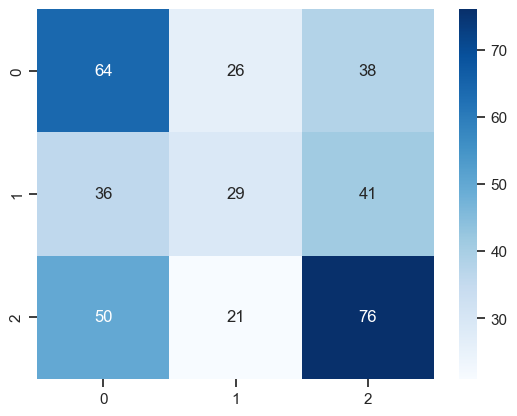

In [44]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
#Make a heatmap for the correlationwhen 
f, axes = plt.subplots(1, 4, figsize=(25,25), sharex=False)
#plt.figure(figsize=(3,100))
sns.heatmap(genetic_cat_corr.iloc[:-6,-6:-1][1:125], cmap = "crest",linewidths=0.1, cbar = False, ax=axes[0])
sns.heatmap(genetic_cat_corr.iloc[:-6,-6:-1][126:250], cmap = "crest",linewidths=0.1, cbar = False,ax=axes[1])
sns.heatmap(genetic_cat_corr.iloc[:-6,-6:-1][251:375], cmap = "crest",linewidths=0.1, cbar = False,ax=axes[2])
sns.heatmap(genetic_cat_corr.iloc[:-6,-6:-1][376:593], cmap = "crest",linewidths=0.1, ax=axes[3])

Mutation Analysis

In [ ]:
df_mutation =data.iloc[:,520:]
df_mutation.head()

In [ ]:
unique_mutation=pd.DataFrame({"unique":df_mutation.nunique()})
unique_mutation.sort_values(by="unique",ascending= False).head(n=25)

In [ ]:
for col in df_mutation:
    df_mutation[col]=df_mutation[col].astype("category")

In [ ]:
df_mutation.duplicated().sum